In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import re
import pandas as pd

In [2]:
import sklearn
import sklearn.metrics as metrics
from sklearn.linear_model import LinearRegression
#rom sklearn.ensemble import RandomForestClassifier
#from sklearn.linear_model import LassoLars

#from sklearn.linear_model import TweedieRegressor

from sklearn.linear_model import (
    LinearRegression, TheilSenRegressor, RANSACRegressor, HuberRegressor)
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [3]:
def get_ranks(good_df,ypred):
    cutoff=0.2
    #print (codedata,ypred,ydata)
    #print (len(ypred),len(good_df.mm.to_list()))
    d = {'code':good_df.code.to_list(),'pred':ypred,
         "dockQ":good_df.dockQ.to_list(),"params":good_df.params.to_list(),
        "mm":good_df.mm.to_list()}
    res_df=pd.DataFrame(d).sort_values("pred")
    #res_df.sort_values("CODE")

    i=0
    sumdiff=0
    mmdiff=0
    correct=0
    for code in res_df.code.unique():
        topranked=res_df.loc[res_df.code==code].sort_values("pred")["dockQ"][-1:].max()
        best=res_df.loc[res_df.code==code]["dockQ"].max()
        mmtop=res_df.loc[res_df.code==code].sort_values("pred")["mm"][-1:].max()
        mmbest=res_df.loc[res_df.code==code]["mm"].max()
        #print (code,topranked,best)
        if best>cutoff:
            i+=1
            sumdiff+=best-topranked
            mmdiff+=mmbest-mmtop
            if topranked>cutoff:
                correct+=1
    #print (i,correct,round(sumdiff/i,3))            
    return (i,correct,sumdiff,mmdiff)

In [4]:
reg = LinearRegression()
#reg=RandomForestClassifier(n_estimators=10)
#reg=LassoLars(alpha=.1)
#reg = TweedieRegressor(power=1, alpha=0.5, link='log')
#reg=TheilSenRegressor(random_state=42)
#reg=RANSACRegressor(random_state=42)
#reg=HuberRegressor()

In [5]:
df=pd.read_csv("~/Downloads/summary.csv",sep=",")
df=df.dropna()
#df.JHparams.unique()

In [6]:
df

name      JHparams  lenA  lenB   msa    msaA   msaB  \
0      1ay7_u1_A-1ay7_u2_A  -N 3 --cpu 8    97    90  1060    1485   2034   
1      1ay7_u2_A-1ay7_u1_A  -N 3 --cpu 8    90    97  1060    2034   1485   
2      1b27_u1_A-1b27_u2_A  -N 3 --cpu 8   109    90   733    1484   2034   
3      1b27_u2_A-1b27_u1_A  -N 3 --cpu 8    90   109   733    2034   1484   
4      1bdj_u1_A-1bdj_u2_A  -N 3 --cpu 8   129   118  5651  349880  23051   
...                    ...           ...   ...   ...   ...     ...    ...   
38342  4xhu_u1_A-4xhu_u2_A        TMdock   352    95   410    8381    307   
38343  4xhu_u1_A-4xhu_u2_A        TMdock   352    95   410    8381    307   
38344  4xhu_u1_A-4xhu_u2_A        TMdock   352    95   410    8381    307   
38345  4xhu_u1_A-4xhu_u2_A        TMdock   352    95   410    8381    307   
38346  4xhu_u1_A-4xhu_u2_A        TMdock   352    95   410    8381    307   

       cdhit  dockQ   fnat  ...  shortMCCMODEL  medMCCMODEL  longMCCMODEL  \
0       1026  0.281  0.167  ...            0.0        0.500         0.983   
1        989  0.239  0.250  ...            0.0        0.554         0.971   
2        654  0.223  0.120  ...            0.0        0.548         0.990   
3        656  0.229  0.160  ...            0.0        0.522         0.980   
4       5071  0.000  0.000  ...            0.0        0.000         0.000   
...      ...    ...    ...  ...            ...          ...           ...   
38342     66  0.000  0.000  ...            0.0        0.000         0.000   
38343     66  0.009  0.000  ...            0.0        0.000         0.049   
38344     66  0.000  0.000  ...            0.0        0.000         0.000   
38345     66  0.011  0.000  ...            0.0        0.000        -0.001   
38346     66  0.003  0.000  ...            0.0        0.000         0.000   

       shortF1MODEL  medF1MODEL  longF1MODEL  rank       pcd       mmd  taxa  
0               0.0       0.400        0.984     1  0.798400  0.826483     2  
1               0.0       0.471        0.971     2  0.837400  0.823468     2  
2               0.0       0.462        0.990     1  0.841200  0.827082     2  
3               0.0       0.429        0.980     2  0.765400  0.817868     2  
4               0.0       0.000        0.000     1  0.000000  0.431493     2  
...             ...         ...          ...   ...       ...       ...   ...  
38342           0.0       0.000        0.000     5  0.000200  0.709884     1  
38343           0.0       0.000        0.040     6  0.001111  0.709884     1  
38344           0.0       0.000        0.000     7  0.000100  0.709884     1  
38345           0.0       0.000        0.000     8  0.001000  0.709884     1  
38346           0.0       0.000        0.000     9  0.000500  0.709884     1  

[38345 rows x 83 columns]

In [7]:
sns.set(style="whitegrid")

In [8]:
df["name"]
df.keys()

Index(['name', 'JHparams', 'lenA', 'lenB', 'msa', 'msaA', 'msaB', 'cdhit',
       'dockQ', 'fnat', 'iRMS', 'LRMS', 'fnonnat', 'mm', 'tmA', 'tmB', 'long',
       'med', 'longPPV', 'medPPV', 'longA', 'medA', 'longPPVA', 'medPPVA',
       'longB', 'medB', 'longPPVB', 'medPPVB', 'short', 'shortPPV', 'shortA',
       'shortPPVA', 'shortB', 'shortPPVB', 'shortpdb', 'medpdb', 'longpdb',
       'avprob', 'longMODEL', 'medMODEL', 'longPPVMODEL', 'medPPVMODEL',
       'longAMODEL', 'medAMODEL', 'longPPVAMODEL', 'medPPVAMODEL',
       'longBMODEL', 'medBMODEL', 'longPPVBMODEL', 'medPPVBMODEL',
       'shortMODEL', 'shortPPVMODEL', 'shortAMODEL', 'shortPPVAMODEL',
       'shortBMODEL', 'shortPPVBMODEL', 'shortpdbMODEL', 'medpdbMODEL',
       'longpdbMODEL', 'avprobMODEL', 'evalue', 'seqid', 'hhprob', 'hhevalue',
       'hhscore', 'PconsDock', 'MMdock', 'shortMCC', 'medMCC', 'longMCC',
       'shortF1', 'medF1', 'longF1', 'shortMCCMODEL', 'medMCCMODEL',
       'longMCCMODEL', 'shortF1MODEL', 'medF1

In [9]:

df["code"]=df["name"].str[:4]
df["CODE"]=df["code"]
df["params"]=df["JHparams"]
datasets=df.JHparams.unique()
datasets

array(['-N 3 --cpu 8', 'confold-contacts', 'confold-merged',
       'confold-npz', 'confold-pdb', 'confold-plm', 'confold',
       'confold-raptorx', 'gramm-contact', 'gramm', 'gramm-raptorx',
       'gramm-score2', 'gramm-score', 'gramm-trmodels', 'N1-all',
       '-N 1 -E 1.e-2 ', 'N1-cov50', 'N1-cov90-minprob25', 'N1-cov90',
       'N1-minprob25', 'N1-N3-cov90', 'N1-N3-cov-nocov', 'N1-N3-new',
       'N1-N3-multimerged', '-N 1 -E 1.e-10 --cpu 8 ', 'N3-all',
       'N3-bact', 'N3-cov50', 'N3-cov90-minprob25', 'N3-cov90',
       'N3-merged', 'N3-minprob25', 'N3-pdb', '-N 5 --cpu 8',
       'pdbconfold', 'RaptorX', 'rbh-jh', 'rbh', 'TMdock-double',
       'TMdock-nohomology', 'TMdock'], dtype=object)

In [10]:
#codes=df.loc[(df.JHparams=="-N 3 --cpu 8") & (df.hhprob<50.) ]["code"].unique()
codes=df["code"].unique()
len(codes)

217

In [11]:
df=df.loc[df.code.isin(codes)]
df

name      JHparams  lenA  lenB   msa    msaA   msaB  \
0      1ay7_u1_A-1ay7_u2_A  -N 3 --cpu 8    97    90  1060    1485   2034   
1      1ay7_u2_A-1ay7_u1_A  -N 3 --cpu 8    90    97  1060    2034   1485   
2      1b27_u1_A-1b27_u2_A  -N 3 --cpu 8   109    90   733    1484   2034   
3      1b27_u2_A-1b27_u1_A  -N 3 --cpu 8    90   109   733    2034   1484   
4      1bdj_u1_A-1bdj_u2_A  -N 3 --cpu 8   129   118  5651  349880  23051   
...                    ...           ...   ...   ...   ...     ...    ...   
38342  4xhu_u1_A-4xhu_u2_A        TMdock   352    95   410    8381    307   
38343  4xhu_u1_A-4xhu_u2_A        TMdock   352    95   410    8381    307   
38344  4xhu_u1_A-4xhu_u2_A        TMdock   352    95   410    8381    307   
38345  4xhu_u1_A-4xhu_u2_A        TMdock   352    95   410    8381    307   
38346  4xhu_u1_A-4xhu_u2_A        TMdock   352    95   410    8381    307   

       cdhit  dockQ   fnat  ...  shortF1MODEL  medF1MODEL  longF1MODEL  rank  \
0       1026  0.281  0.167  ...           0.0       0.400        0.984     1   
1        989  0.239  0.250  ...           0.0       0.471        0.971     2   
2        654  0.223  0.120  ...           0.0       0.462        0.990     1   
3        656  0.229  0.160  ...           0.0       0.429        0.980     2   
4       5071  0.000  0.000  ...           0.0       0.000        0.000     1   
...      ...    ...    ...  ...           ...         ...          ...   ...   
38342     66  0.000  0.000  ...           0.0       0.000        0.000     5   
38343     66  0.009  0.000  ...           0.0       0.000        0.040     6   
38344     66  0.000  0.000  ...           0.0       0.000        0.000     7   
38345     66  0.011  0.000  ...           0.0       0.000        0.000     8   
38346     66  0.003  0.000  ...           0.0       0.000        0.000     9   

            pcd       mmd  taxa  code  CODE        params  
0      0.798400  0.826483     2  1ay7  1ay7  -N 3 --cpu 8  
1      0.837400  0.823468     2  1ay7  1ay7  -N 3 --cpu 8  
2      0.841200  0.827082     2  1b27  1b27  -N 3 --cpu 8  
3      0.765400  0.817868     2  1b27  1b27  -N 3 --cpu 8  
4      0.000000  0.431493     2  1bdj  1bdj  -N 3 --cpu 8  
...         ...       ...   ...   ...   ...           ...  
38342  0.000200  0.709884     1  4xhu  4xhu        TMdock  
38343  0.001111  0.709884     1  4xhu  4xhu        TMdock  
38344  0.000100  0.709884     1  4xhu  4xhu        TMdock  
38345  0.001000  0.709884     1  4xhu  4xhu        TMdock  
38346  0.000500  0.709884     1  4xhu  4xhu        TMdock  

[38345 rows x 86 columns]

In [12]:
Rosettaset=['-N 1 -E 1.e-10 --cpu 8 ','-N 3 --cpu 8', 
            'N1-cov90','N3-cov90', 'N1-N3-multimerged', 'N1-N3-new', 'N1-N3-cov90', 'N1-N3-cov-nocov'] 


In [13]:
r=re.compile("^PDB|^pdb|^TMd|gramm")
datasets=df.JHparams.unique()
#notRosettaset=list(filter(r.match, datasets))
#df2=df.loc[~df.JHparams.isin(notRosettaset)].copy()
Rosettaset=['-N 1 -E 1.e-10 --cpu 8 ','-N 3 --cpu 8', 
            'N1-cov90','N3-cov90', 'N1-N3-multimerged', 'N1-N3-new', 'N1-N3-cov90', 'N1-N3-cov-nocov'] 
# We have to think which ones to use..
df2=df.loc[df.JHparams.isin(Rosettaset)].copy()
df2.JHparams="trRosetta"
df2.params="trRosetta"

columns=df2.keys()
df3=pd.DataFrame(columns=columns)

# we need tpo update the ranks
df2.sort_values("PconsDock",axis=0,inplace=True)
for code in df2["code"].unique():
    tempdf=df2.loc[df2["code"]==code]
    tempdf["rank"]=tempdf["dockQ"].rank(method="first",ascending=False)
    #tempdf.drop(columns=["newrank"])
    df3=pd.concat([df3,tempdf],ignore_index=True)
    #tempdf=df2.loc[df2["code"]==code].sort_values("dockQ",axis=0)
    #tempdf["rank"]=tempdf.rank(method="average",ascending=False)

#df3


<ipython-input-13-17858577446d>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tempdf["rank"]=tempdf["dockQ"].rank(method="first",ascending=False)


In [14]:
df=pd.concat([df,df3], ignore_index=True,sort=False)
df.fillna(0)
#df.JHparams.unique()


name      JHparams  lenA  lenB   msa    msaA   msaB  \
0      1ay7_u1_A-1ay7_u2_A  -N 3 --cpu 8    97    90  1060    1485   2034   
1      1ay7_u2_A-1ay7_u1_A  -N 3 --cpu 8    90    97  1060    2034   1485   
2      1b27_u1_A-1b27_u2_A  -N 3 --cpu 8   109    90   733    1484   2034   
3      1b27_u2_A-1b27_u1_A  -N 3 --cpu 8    90   109   733    2034   1484   
4      1bdj_u1_A-1bdj_u2_A  -N 3 --cpu 8   129   118  5651  349880  23051   
...                    ...           ...   ...   ...   ...     ...    ...   
42219  1gpw_u2_A-1gpw_u1_A     trRosetta   204   252  5974    7554  13532   
42220  1gpw_u2_A-1gpw_u1_A     trRosetta   204   252  7137   67629  58466   
42221  1gpw_u1_A-1gpw_u2_A     trRosetta   252   204  7137   58466  67629   
42222  1gpw_u1_A-1gpw_u2_A     trRosetta   252   204  4968   13532   7554   
42223  1gpw_u2_A-1gpw_u1_A     trRosetta   204   252  4968    7554  13532   

       cdhit  dockQ   fnat  ...  shortF1MODEL  medF1MODEL  longF1MODEL  rank  \
0       1026  0.281  0.167  ...           0.0       0.400        0.984   1.0   
1        989  0.239  0.250  ...           0.0       0.471        0.971   2.0   
2        654  0.223  0.120  ...           0.0       0.462        0.990   1.0   
3        656  0.229  0.160  ...           0.0       0.429        0.980   2.0   
4       5071  0.000  0.000  ...           0.0       0.000        0.000   1.0   
...      ...    ...    ...  ...           ...         ...          ...   ...   
42219   4801  0.329  0.333  ...           0.0       0.167        0.870   7.0   
42220    563  0.241  0.280  ...           0.0       0.000        0.000  14.0   
42221    575  0.219  0.227  ...           0.0       0.000        0.000  17.0   
42222   3994  0.345  0.373  ...           0.0       0.176        0.846   5.0   
42223   3988  0.271  0.187  ...           0.0       0.179        0.854  10.0   

          pcd       mmd  taxa  code  CODE        params  
0      0.7984  0.826483     2  1ay7  1ay7  -N 3 --cpu 8  
1      0.8374  0.823468     2  1ay7  1ay7  -N 3 --cpu 8  
2      0.8412  0.827082     2  1b27  1b27  -N 3 --cpu 8  
3      0.7654  0.817868     2  1b27  1b27  -N 3 --cpu 8  
4      0.0000  0.431493     2  1bdj  1bdj  -N 3 --cpu 8  
...       ...       ...   ...   ...   ...           ...  
42219  0.8018  0.825775     2  1gpw  1gpw     trRosetta  
42220 -1.0000 -1.000000     2  1gpw  1gpw     trRosetta  
42221 -1.0000 -1.000000     2  1gpw  1gpw     trRosetta  
42222  0.8064  0.824672     2  1gpw  1gpw     trRosetta  
42223  0.7862  0.827195     2  1gpw  1gpw     trRosetta  

[42224 rows x 86 columns]

In [15]:
#df.loc[df.JHparams=="N1-N3-new"]
Dockingset=Rosettaset+["confold","gramm","gramm-contact","gramm-trmodels","gramm-raptorx","TMdock-double","TMdock","trRosetta"]

In [16]:
r=re.compile("^PDB|^pdb")
datasets=df.JHparams.unique()
pdbset=list(filter(r.match, datasets))
df2=df.loc[(df.JHparams.isin(pdbset))&(~df.JHparams.isin(["pdbconfold"]))].copy()
df2.JHparams="PDB"
df2.params="PDB"
df2

Empty DataFrame
Columns: [name, JHparams, lenA, lenB, msa, msaA, msaB, cdhit, dockQ, fnat, iRMS, LRMS, fnonnat, mm, tmA, tmB, long, med, longPPV, medPPV, longA, medA, longPPVA, medPPVA, longB, medB, longPPVB, medPPVB, short, shortPPV, shortA, shortPPVA, shortB, shortPPVB, shortpdb, medpdb, longpdb, avprob, longMODEL, medMODEL, longPPVMODEL, medPPVMODEL, longAMODEL, medAMODEL, longPPVAMODEL, medPPVAMODEL, longBMODEL, medBMODEL, longPPVBMODEL, medPPVBMODEL, shortMODEL, shortPPVMODEL, shortAMODEL, shortPPVAMODEL, shortBMODEL, shortPPVBMODEL, shortpdbMODEL, medpdbMODEL, longpdbMODEL, avprobMODEL, evalue, seqid, hhprob, hhevalue, hhscore, PconsDock, MMdock, shortMCC, medMCC, longMCC, shortF1, medF1, longF1, shortMCCMODEL, medMCCMODEL, longMCCMODEL, shortF1MODEL, medF1MODEL, longF1MODEL, rank, pcd, mmd, taxa, code, CODE, params]
Index: []

[0 rows x 86 columns]

In [17]:
df=pd.concat([df,df2], ignore_index=True,sort=False)
df.fillna(0)
df.params.unique()

array(['-N 3 --cpu 8', 'confold-contacts', 'confold-merged',
       'confold-npz', 'confold-pdb', 'confold-plm', 'confold',
       'confold-raptorx', 'gramm-contact', 'gramm', 'gramm-raptorx',
       'gramm-score2', 'gramm-score', 'gramm-trmodels', 'N1-all',
       '-N 1 -E 1.e-2 ', 'N1-cov50', 'N1-cov90-minprob25', 'N1-cov90',
       'N1-minprob25', 'N1-N3-cov90', 'N1-N3-cov-nocov', 'N1-N3-new',
       'N1-N3-multimerged', '-N 1 -E 1.e-10 --cpu 8 ', 'N3-all',
       'N3-bact', 'N3-cov50', 'N3-cov90-minprob25', 'N3-cov90',
       'N3-merged', 'N3-minprob25', 'N3-pdb', '-N 5 --cpu 8',
       'pdbconfold', 'RaptorX', 'rbh-jh', 'rbh', 'TMdock-double',
       'TMdock-nohomology', 'TMdock', 'trRosetta'], dtype=object)

In [18]:
# Add a linear combination of trRosetta
# Does not work
r=re.compile(".*-N.*") # .*cpu.*
datasets=Rosettaset
#JHsets=list(filter(r.match, datasets))



In [19]:
cutoff=0.2
goodmodels=df.loc[(df.dockQ>cutoff)&(df.JHparams.isin(Rosettaset))].code.unique()
good_df=df.loc[(df.code.isin(goodmodels))&(df.JHparams.isin(Rosettaset))] #.reset_index()
df.dockQ.dtypes

dtype('float64')

In [20]:
#df[(df.JHparams=="gramm-trmodels")][["rank","name","dockQ"]].sort_values(["dockQ"])



In [21]:
#topranked

In [22]:

df

name      JHparams lenA lenB   msa    msaA   msaB cdhit  \
0      1ay7_u1_A-1ay7_u2_A  -N 3 --cpu 8   97   90  1060    1485   2034  1026   
1      1ay7_u2_A-1ay7_u1_A  -N 3 --cpu 8   90   97  1060    2034   1485   989   
2      1b27_u1_A-1b27_u2_A  -N 3 --cpu 8  109   90   733    1484   2034   654   
3      1b27_u2_A-1b27_u1_A  -N 3 --cpu 8   90  109   733    2034   1484   656   
4      1bdj_u1_A-1bdj_u2_A  -N 3 --cpu 8  129  118  5651  349880  23051  5071   
...                    ...           ...  ...  ...   ...     ...    ...   ...   
42219  1gpw_u2_A-1gpw_u1_A     trRosetta  204  252  5974    7554  13532  4801   
42220  1gpw_u2_A-1gpw_u1_A     trRosetta  204  252  7137   67629  58466   563   
42221  1gpw_u1_A-1gpw_u2_A     trRosetta  252  204  7137   58466  67629   575   
42222  1gpw_u1_A-1gpw_u2_A     trRosetta  252  204  4968   13532   7554  3994   
42223  1gpw_u2_A-1gpw_u1_A     trRosetta  204  252  4968    7554  13532  3988   

       dockQ   fnat  ...  shortF1MODEL  medF1MODEL  longF1MODEL  rank     pcd  \
0      0.281  0.167  ...           0.0       0.400        0.984   1.0  0.7984   
1      0.239  0.250  ...           0.0       0.471        0.971   2.0  0.8374   
2      0.223  0.120  ...           0.0       0.462        0.990   1.0  0.8412   
3      0.229  0.160  ...           0.0       0.429        0.980   2.0  0.7654   
4      0.000  0.000  ...           0.0       0.000        0.000   1.0  0.0000   
...      ...    ...  ...           ...         ...          ...   ...     ...   
42219  0.329  0.333  ...           0.0       0.167        0.870   7.0  0.8018   
42220  0.241  0.280  ...           0.0       0.000        0.000  14.0 -1.0000   
42221  0.219  0.227  ...           0.0       0.000        0.000  17.0 -1.0000   
42222  0.345  0.373  ...           0.0       0.176        0.846   5.0  0.8064   
42223  0.271  0.187  ...           0.0       0.179        0.854  10.0  0.7862   

            mmd taxa  code  CODE        params  
0      0.826483    2  1ay7  1ay7  -N 3 --cpu 8  
1      0.823468    2  1ay7  1ay7  -N 3 --cpu 8  
2      0.827082    2  1b27  1b27  -N 3 --cpu 8  
3      0.817868    2  1b27  1b27  -N 3 --cpu 8  
4      0.431493    2  1bdj  1bdj  -N 3 --cpu 8  
...         ...  ...   ...   ...           ...  
42219  0.825775    2  1gpw  1gpw     trRosetta  
42220 -1.000000    2  1gpw  1gpw     trRosetta  
42221 -1.000000    2  1gpw  1gpw     trRosetta  
42222  0.824672    2  1gpw  1gpw     trRosetta  
42223  0.827195    2  1gpw  1gpw     trRosetta  

[42224 rows x 86 columns]

In [23]:
#df["rank"].str.isnumeric().unique()
#df.dtypes

In [24]:
# We need to check that everything is numeric
#cols=['name', 'JHparams', 'seqid',      'rank']

#for d in df.columns.values.tolist():
#for d in ["rank","len"]:
##    if d=="name": continue
#    if d=="JHparams": continue
#    print (d)
#    print (df.loc[(df[d].str.isnumeric()!=True)][cols+[d]])
#    #print (df.loc[(df[d].str.isnumeric()][d].unique()
#    print (df[d].str.isnumeric().unique())

In [25]:
# Divide data into datasets


df["tmAB"]=df[["tmA","tmB"]].mean(axis=1)
df["msaAB"]=df[["msaA","msaB"]].mean(axis=1)
df["tmAB_max"]=df[["tmA","tmB"]].max(axis=1)
df["msaAB_max"]=df[["msaA","msaB"]].max(axis=1)
df["tmAB_min"]=df[["tmA","tmB"]].min(axis=1)
df["msaAB_min"]=df[["msaA","msaB"]].min(axis=1)
df["numcorrect"]=df["longPPV"]*df["long"]
df["len"]=df["lenA"]+df["lenB"]

codes=df.code.unique()
df_mean=df.groupby(["JHparams","code"]).mean()
df_max=df.groupby(["JHparams","code"]).max()
df_min=df.groupby(["JHparams","code"]).min()
df_first=df.loc[df["rank"]==1]

In [26]:
#df.columns.values.tolist()
#df["rank"]==1


In [27]:
cols=['name', 'JHparams', 'seqid',      'rank']
      
#d="TMdock-homology"
#df.loc[df.JHparams==d].groupby(["code"])[cols].first()

#df.loc[(df.JHparams==d) & ((df["rank"].str.isnumeric()!=True))][cols]
#df.loc[(df.JHparams==d)]["rank"].str.isnumeric()
#df.loc[(df.JHparams==d)] 
      
      

In [28]:
datasets=df.JHparams.unique()
data_mean={}
data_max={}
data_min={}
for d in datasets:
    print (d)
    data_mean[d]=df.loc[df.JHparams==d].groupby(["code"]).mean()
    data_max[d]=df.loc[df.JHparams==d].groupby(["code"]).max()
    data_min[d]=df.loc[df.JHparams==d].groupby(["code"]).min()


-N 3 --cpu 8


confold-contacts


confold-merged


confold-npz


confold-pdb


confold-plm


confold


confold-raptorx


gramm-contact


gramm


gramm-raptorx


gramm-score2


gramm-score


gramm-trmodels


N1-all


-N 1 -E 1.e-2 


N1-cov50


N1-cov90-minprob25


N1-cov90


N1-minprob25


N1-N3-cov90


N1-N3-cov-nocov


N1-N3-new


N1-N3-multimerged


-N 1 -E 1.e-10 --cpu 8 


N3-all


N3-bact


N3-cov50


N3-cov90-minprob25


N3-cov90


N3-merged


N3-minprob25


N3-pdb


-N 5 --cpu 8


pdbconfold


RaptorX


rbh-jh


rbh


TMdock-double


TMdock-nohomology
TMdock


trRosetta


In [29]:
#df.loc[ (df.JHparams=="trRosetta")  & (df["rank"]==1)]

In [30]:
#df.JHparams.unique()
datasets

array(['-N 3 --cpu 8', 'confold-contacts', 'confold-merged',
       'confold-npz', 'confold-pdb', 'confold-plm', 'confold',
       'confold-raptorx', 'gramm-contact', 'gramm', 'gramm-raptorx',
       'gramm-score2', 'gramm-score', 'gramm-trmodels', 'N1-all',
       '-N 1 -E 1.e-2 ', 'N1-cov50', 'N1-cov90-minprob25', 'N1-cov90',
       'N1-minprob25', 'N1-N3-cov90', 'N1-N3-cov-nocov', 'N1-N3-new',
       'N1-N3-multimerged', '-N 1 -E 1.e-10 --cpu 8 ', 'N3-all',
       'N3-bact', 'N3-cov50', 'N3-cov90-minprob25', 'N3-cov90',
       'N3-merged', 'N3-minprob25', 'N3-pdb', '-N 5 --cpu 8',
       'pdbconfold', 'RaptorX', 'rbh-jh', 'rbh', 'TMdock-double',
       'TMdock-nohomology', 'TMdock', 'trRosetta'], dtype=object)

In [31]:
data_first={}
data_second={}
for d in datasets:
    data_first[d]=df.loc[ (df["JHparams"]==d)  & (df["rank"]==1)]
    data_second[d]=df.loc[ (df["JHparams"]==d)  & (df["rank"]==2)]
data_first["trRosetta"]

name   JHparams lenA lenB   msa    msaA    msaB cdhit  \
38359  5eg3_u2_A-5eg3_u1_A  trRosetta  105  303   100   25926  565997     8   
38377  1xt9_u2_A-1xt9_u1_A  trRosetta   77  209  1319   41914   17327   829   
38394  1y64_u1_A-1y64_u2_A  trRosetta  412  361   682    1599   22900   261   
38409  1y8x_u2_A-1y8x_u1_A  trRosetta   98  169   245    1246   37696    18   
38425  1yu6_u1_A-1yu6_u2_A  trRosetta  275   52   100   54420   15186    61   
...                    ...        ...  ...  ...   ...     ...     ...   ...   
42150  4yoc_u2_A-4yoc_u1_A  trRosetta  530  905   333    4076   31492    77   
42166  4gmj_u2_A-4gmj_u1_A  trRosetta  236  253  1189    1646    6152   546   
42173  4rix_u1_A-4rix_u2_A  trRosetta  294  273  1202  102230   79228   596   
42202  2zae_u2_A-2zae_u1_A  trRosetta   93  107  1058    1521    1659   308   
42212  1gpw_u2_A-1gpw_u1_A  trRosetta  204  252  7137   67629   58466  5343   

       dockQ   fnat  ...  CODE     params      tmAB     msaAB  tmAB_max  \
38359  0.028  0.000  ...  5eg3  trRosetta  0.822720  295961.5   0.84654   
38377  0.001  0.000  ...  1xt9  trRosetta  0.781005   29620.5   0.78926   
38394  0.014  0.000  ...  1y64  trRosetta  0.338860   12249.5   0.40385   
38409  0.096  0.140  ...  1y8x  trRosetta  0.727385   19471.0   0.73819   
38425  0.060  0.000  ...  1yu6  trRosetta  0.808070   34803.0   0.88651   
...      ...    ...  ...   ...        ...       ...       ...       ...   
42150  0.007  0.000  ...  4yoc  trRosetta  0.209005   17784.0   0.22898   
42166  0.445  0.780  ...  4gmj  trRosetta  0.825750    3899.0   0.85191   
42173  0.011  0.000  ...  4rix  trRosetta  0.649540   90729.0   0.66094   
42202  0.519  0.452  ...  2zae  trRosetta  0.802020    1590.0   0.82241   
42212  0.354  0.293  ...  1gpw  trRosetta  0.889770   63047.5   0.89718   

       msaAB_max tmAB_min msaAB_min  numcorrect   len  
38359   565997.0  0.79890   25926.0           0   408  
38377    41914.0  0.77275   17327.0           0   286  
38394    22900.0  0.27387    1599.0           0   773  
38409    37696.0  0.71658    1246.0           0   267  
38425    54420.0  0.72963   15186.0           0   327  
...          ...      ...       ...         ...   ...  
42150    31492.0  0.18903    4076.0           0  1435  
42166     6152.0  0.79959    1646.0     133.061   489  
42173   102230.0  0.63814   79228.0           0   567  
42202     1659.0  0.78163    1521.0      81.958   200  
42212    67629.0  0.88236   58466.0      102.96   456  

[217 rows x 94 columns]

Rosettaset Rosettaset
Set:  -N 1 -E 1.e-10 --cpu 8 
Set:  -N 3 --cpu 8
Set:  N1-cov90
Set:  N3-cov90
Set:  N1-N3-multimerged
Set:  N1-N3-new
Set:  N1-N3-cov90
Set:  N1-N3-cov-nocov
1ay7
1b27
1gpw
1v5i
1vrs
2d5r
2hqs
2hrk
2o3b
2zae
3a8i
3k1i
4gmj
4pw9
4xhu
15 15


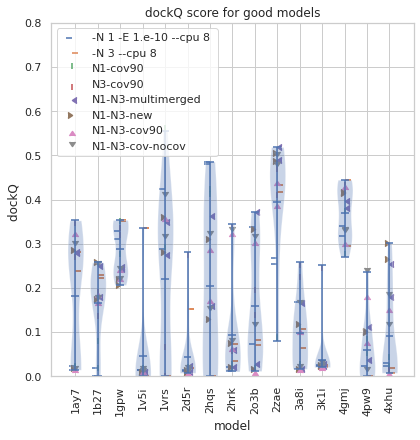

In [35]:
#datasets
#d

marker=[".","S",">","<","P","D","H","d","h","p"]
sets= {"Rosettaset":"Rosettaset"}
setdata={"Rosettaset":Rosettaset}
cutoff=0.23        
for s in sets.keys():
    print (s,sets[s])
        
    goodmodels2=list(df.loc[(df.dockQ>cutoff)&(df.params.isin(setdata[s]))].sort_values(by="code").code.unique())
    good_df=df.loc[(df.code.isin(goodmodels2)&(df.params.isin(setdata[s])))].sort_values(by="code") #.reset_index()
    #df["good"]=df["code"].isin(goodmodels)
    #print (goodmodels)

    f, ax = plt.subplots(figsize=(6.5, 6.5))
    i=0
    for k in setdata[s]:
        print ("Set: ",k)
        tempdf=good_df.loc[(good_df.params==k)].sort_values(by="code")
        plt.scatter(tempdf.code,tempdf.dockQ,label=k ,marker=marker[i])
        i+=1
    plt.xticks(rotation=90)
    ax.legend()
    ax.set_title("dockQ score for good models")
    ax.set_ylabel("dockQ ")
    ax.set_xlabel("model")
    ax.set(ylim=[0,0.8])
    i=0
    data=[]
    pos=[]
    for m in goodmodels2:
        print (m)
        data+=[good_df.loc[(good_df.code==m)]["dockQ"].to_list()]
        pos+=[i]
        i+=1

    print (len(data),len(pos))    
    ax.violinplot(data,pos, points=80, vert=True, widths=0.7,
                      showmeans=True, showextrema=True,  showmedians=False)
    #plt.savefig("good-violin-"+s+".png",bbox_inches="tight",dpi=600)
    #plt.close(fig="all")



In [33]:
df_test= data_first["N1-cov90"]
#data_first["N1-merged"].tmA
df_test["tmB"]


10410    0.46284
10412    0.63038
10414    0.78949
10416    0.54834
10419    0.76954
          ...   
10803    0.61875
10805    0.74274
10807    0.42238
10810    0.70704
10811    0.56993
Name: tmB, Length: 212, dtype: float64

In [34]:
df_merged = pd.merge(data_first["trRosetta"],data_first[d], on=['code'],how="inner")
#plt.scatter(data_first["trRosetta"].dockQ,data_first["trRosetta"].mm)

/home/arnee/.local/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


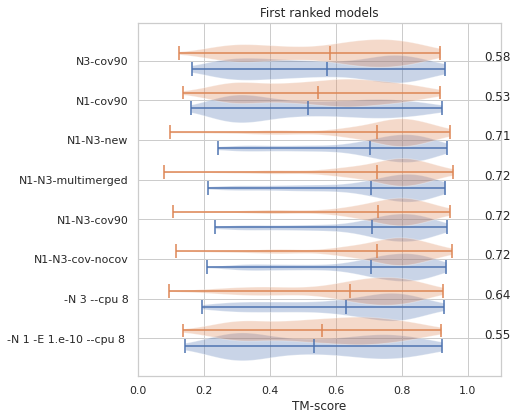

In [35]:
# FInd best method for each model.
selset=Rosettaset
#codes=df_max.loc[df_max.params.isin(selset)]["CODE"].unique()
f, ax = plt.subplots(figsize=(6.5, 6.5))

all_df=df_first.loc[(df_first.params.isin(selset))].reset_index()
all_df.sort_values("JHparams")
#print (all_df)
#plt.scatter(all_df.tmA,all_df.JHparams,color="red")
ax.set_title("First ranked models")
#ax.set_ylabel("Method")
ax.set_xlabel("TM-score")
ax.set(xlim=[0,1.1])
done={}
average=[]
length={}
pos=[]
posA=[]
posB=[]
POS=[]
i=0
dataA=[]
dataB=[]
keys=[]
shift=0.2
for d in sorted(selset,reverse=False):
    #done[d]=0
    average+=[0.5*(all_df.loc[(all_df.params==d)]["tmA"].mean()+all_df.loc[(all_df.params==d)]["tmB"].mean())]
    #length[d]=len(all_df.loc[(all_df.params==d)]["tmA"])
    pos+=[i]
    posA+=[i-shift]
    posB+=[i+shift]
    keys+=[d]
    dataA+=[all_df.loc[(all_df.JHparams==d)]["tmA"].to_list()]
    dataB+=[all_df.loc[(all_df.JHparams==d)]["tmB"].to_list()]
    POS+=[[i]*len(dataA[i])]
    #print (d,i,len(pos),pos[i],len(data),len(data[i]))
    i+=1
ax.set_yticklabels(keys)
ax.set_yticks(pos)
for i in range(len(dataA)):
    #plt.scatter(dataA[i],POS[i],color="red")
    #plt.scatter(dataB[i],POS[i],color="red")
    sstr=str(round(average[i],2))
    ax.annotate(sstr,(1.05, i))
    #numgood=all (x > cutoffC for x in data[i])
    #ax.annotate("High:  "+str(numgood),(.8, i))

ax.violinplot(dataA,posA, points=80, vert=False, widths=0.7,
                      showmeans=True, showextrema=True, showmedians=False)    
ax.violinplot(dataB,posB, points=80, vert=False, widths=0.7,
                      showmeans=True, showextrema=True, showmedians=False)    
plt.savefig("violin-TM.png",bbox_inches="tight")


ValueError: zero-size array to reduction operation minimum which has no identity

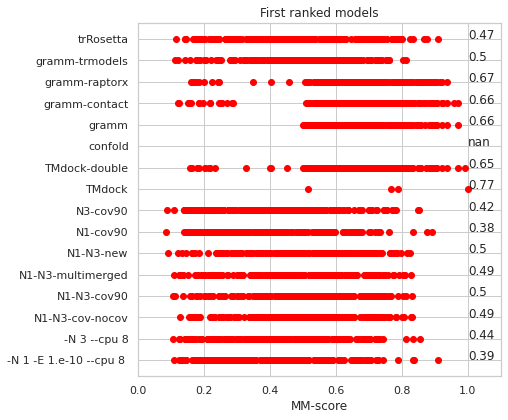

ValueError: zero-size array to reduction operation minimum which has no identity

In [36]:
# FInd best method for each model.
selset=Dockingset
#codes=df_max.loc[df_max.params.isin(selset)]["CODE"].unique()
f, ax = plt.subplots(figsize=(6.5, 6.5))

all_df=df_first.loc[(df_first.params.isin(selset))].reset_index()
all_df.sort_values("JHparams")
#print (all_df)
#plt.scatter(all_df.tmA,all_df.JHparams,color="red")
ax.set_title("First ranked models")
#ax.set_ylabel("Method")
ax.set_xlabel("MM-score")
ax.set(xlim=[0,1.1])
done={}
average=[]
length={}
pos=[]
POS=[]
i=0
data=[]
keys=[]
shift=0.2
for d in sorted(selset,reverse=False):
    #done[d]=0
    average+=[all_df.loc[(all_df.params==d)]["mm"].mean()]
    #length[d]=len(all_df.loc[(all_df.params==d)]["tmA"])
    pos+=[i]
    keys+=[d]
    data+=[all_df.loc[(all_df.JHparams==d)]["mm"].to_list()]
    POS+=[[i]*len(data[i])]
    #print (d,i,len(pos),pos[i],len(data),len(data[i]))
    i+=1
ax.set_yticklabels(keys)
ax.set_yticks(pos)
#print (data,POS)
cutoff=0.5
#cutoffA=0.5
#cutoffB=0.49
#cutoffC=0.80

for i in range(len(data)):
    plt.scatter(data[i],POS[i],color="red")
    numgood=len([x for x in data[i] if x>cutoff])
    sstr=str(round(average[i],2))
    ax.annotate(sstr,(1., i))
    #numgood=all (x > cutoffC for x in data[i])
    #ax.annotate("High:  "+str(numgood),(.8, i))

ax.violinplot(data,pos, points=80, vert=False, widths=0.7,
                      showmeans=True, showextrema=True, showmedians=False)    

plt.savefig("violin-MM.png",bbox_inches="tight")


ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long'

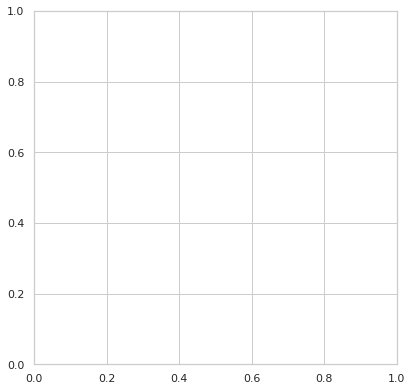

ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long'

In [37]:
# FInd best method for each model.
selset=Dockingset
#codes=df_max.loc[df_max.params.isin(selset)]["CODE"].unique()
f, ax = plt.subplots(figsize=(6.5, 6.5))

all_df=df_first.loc[(df_max.params.isin(selset))].reset_index()
all_df.sort_values("JHparams")
print (all_df)
#plt.scatter(all_df.tmA,all_df.JHparams,color="red")
ax.set_title("Best ranked models")
#ax.set_ylabel("Method")
ax.set_xlabel("MM-score")
ax.set(xlim=[0,1.1])
done={}
average=[]
length={}
pos=[]
POS=[]
i=0
data=[]
keys=[]
shift=0.2
for d in sorted(selset,reverse=False):
    #done[d]=0
    average+=[all_df.loc[(all_df.params==d)]["mm"].mean()]
    #length[d]=len(all_df.loc[(all_df.params==d)]["tmA"])
    pos+=[i]
    keys+=[d]
    data+=[all_df.loc[(all_df.JHparams==d)]["mm"].to_list()]
    POS+=[[i]*len(data[i])]
    #print (d,i,len(pos),pos[i],len(data),len(data[i]))
    i+=1
ax.set_yticklabels(keys)
ax.set_yticks(pos)
#print (data,POS)
cutoff=0.5
#cutoffA=0.5
#cutoffB=0.49
#cutoffC=0.80

for i in range(len(data)):
    plt.scatter(data[i],POS[i],color="red")
    numgood=len([x for x in data[i] if x>cutoff])
    sstr=str(round(average[i],2))
    ax.annotate(sstr,(1., i))
    #numgood=all (x > cutoffC for x in data[i])
    #ax.annotate("High:  "+str(numgood),(.8, i))

ax.violinplot(data,pos, points=80, vert=False, widths=0.7,
                      showmeans=True, showextrema=True, showmedians=False)    

plt.savefig("violin-best-MM.png",bbox_inches="tight")


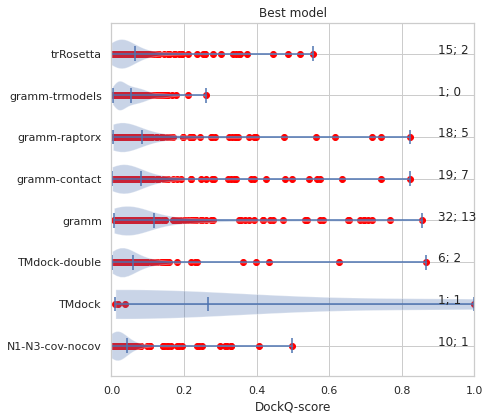

In [38]:
selset=["N1-N3-cov-nocov","trRosetta","gramm","TMdock","TMdock-double","gramm-contact","gramm-trmodels","gramm-raptorx"]
#codes=df_max.loc[df_max.params.isin(selset)]["CODE"].unique()
f, ax = plt.subplots(figsize=(6.5, 6.5))

all_df=df_max.loc[(df_max.params.isin(selset))].reset_index()
all_df.sort_values("JHparams")
#print (all_df)
#plt.scatter(all_df.tmA,all_df.JHparams,color="red")
ax.set_title("Best model")
#ax.set_ylabel("Method")
ax.set_xlabel("DockQ-score")
ax.set(xlim=[0,1])
done={}
average={}
length={}
pos=[]
POS=[]
i=0
data=[]
keys=[]
shift=0.2
for d in sorted(selset,reverse=False):
    #done[d]=0
    #average[d]=all_df.loc[(all_df.params==d)]["tmA"].mean()
    #length[d]=len(all_df.loc[(all_df.params==d)]["tmA"])
    pos+=[i]
    keys+=[d]
    data+=[all_df.loc[(all_df.JHparams==d)]["dockQ"].to_list()]
    POS+=[[i]*len(data[i])]
    #print (d,i,len(pos),pos[i],len(data),len(data[i]))
    i+=1
ax.set_yticklabels(keys)
ax.set_yticks(pos)
#print (data,POS)
cutoff=0.23
cutoffA=0.23
cutoffB=0.49
cutoffC=0.80

for i in range(len(data)):
    plt.scatter(data[i],POS[i],color="red")
    numgoodA=len([x for x in data[i] if x>cutoffA])
    numgoodB=len([x for x in data[i] if x>cutoffB])
    sstr=str(numgoodA)+"; "+str(numgoodB)
    ax.annotate(sstr,(.9, i))
    #numgood=all (x > cutoffC for x in data[i])
    #ax.annotate("High:  "+str(numgood),(.8, i))

ax.violinplot(data,pos, points=80, vert=False, widths=0.7,
                      showmeans=True, showextrema=True, showmedians=False)    

plt.savefig("violin-dockQ-best.png",bbox_inches="tight")


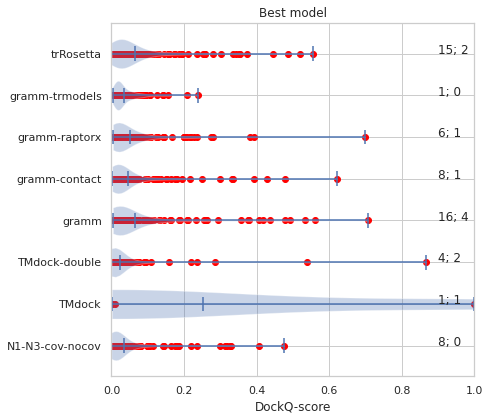

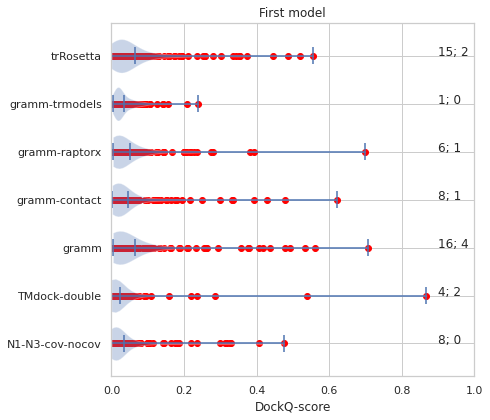

In [39]:
selset=["N1-N3-cov-nocov","trRosetta","gramm","TMdock-double","TMdock","gramm-contact","gramm-trmodels","gramm-raptorx"]
#codes=df_max.loc[df_max.params.isin(selset)]["CODE"].unique()
f, ax = plt.subplots(figsize=(6.5, 6.5))

all_df=df_first.loc[(df_first.params.isin(selset))].reset_index()
all_df.sort_values("JHparams")
#print (all_df)
#plt.scatter(all_df.tmA,all_df.JHparams,color="red")
ax.set_title("Best model")
#ax.set_ylabel("Method")
ax.set_xlabel("DockQ-score")
ax.set(xlim=[0,1])
done={}
average={}
length={}
pos=[]
POS=[]
i=0
data=[]
keys=[]
shift=0.2
for d in sorted(selset,reverse=False):
    #done[d]=0
    #average[d]=all_df.loc[(all_df.params==d)]["tmA"].mean()
    #length[d]=len(all_df.loc[(all_df.params==d)]["tmA"])
    pos+=[i]
    keys+=[d]
    data+=[all_df.loc[(all_df.JHparams==d)]["dockQ"].to_list()]
    POS+=[[i]*len(data[i])]
    #print (d,i,len(pos),pos[i],len(data),len(data[i]))
    i+=1
ax.set_yticklabels(keys)
ax.set_yticks(pos)
#print (data,POS)
cutoff=0.23
cutoffA=0.23
cutoffB=0.49
cutoffC=0.80

for i in range(len(data)):
    plt.scatter(data[i],POS[i],color="red")
    numgoodA=len([x for x in data[i] if x>cutoffA])
    numgoodB=len([x for x in data[i] if x>cutoffB])
    sstr=str(numgoodA)+"; "+str(numgoodB)
    ax.annotate(sstr,(.9, i))
    #numgood=all (x > cutoffC for x in data[i])
    #ax.annotate("High:  "+str(numgood),(.8, i))

ax.violinplot(data,pos, points=80, vert=False, widths=0.7,
                      showmeans=True, showextrema=True, showmedians=False)    

plt.savefig("violin-dockQ-best.png",bbox_inches="tight")
selset=["N1-N3-cov-nocov","trRosetta","gramm","TMdock-double","gramm-contact","gramm-trmodels","gramm-raptorx"]
#codes=df_max.loc[df_max.params.isin(selset)]["CODE"].unique()
f, ax = plt.subplots(figsize=(6.5, 6.5))

all_df=df_first.loc[(df_first.params.isin(selset))].reset_index()
all_df.sort_values("JHparams")
#print (all_df)
#plt.scatter(all_df.tmA,all_df.JHparams,color="red")
ax.set_title("First model")
#ax.set_ylabel("Method")
ax.set_xlabel("DockQ-score")
ax.set(xlim=[0,1])
done={}
average={}
length={}
pos=[]
POS=[]
i=0
data=[]
keys=[]
shift=0.2
for d in sorted(selset,reverse=False):
    #done[d]=0
    #average[d]=all_df.loc[(all_df.params==d)]["tmA"].mean()
    #length[d]=len(all_df.loc[(all_df.params==d)]["tmA"])
    pos+=[i]
    keys+=[d]
    data+=[all_df.loc[(all_df.JHparams==d)]["dockQ"].to_list()]
    POS+=[[i]*len(data[i])]
    #print (d,i,len(pos),pos[i],len(data),len(data[i]))
    i+=1
ax.set_yticklabels(keys)
ax.set_yticks(pos)
#print (data,POS)
cutoff=0.23
cutoffA=0.23
cutoffB=0.49
cutoffC=0.80

for i in range(len(data)):
    plt.scatter(data[i],POS[i],color="red")
    numgoodA=len([x for x in data[i] if x>cutoffA])
    numgoodB=len([x for x in data[i] if x>cutoffB])
    sstr=str(numgoodA)+"; "+str(numgoodB)
    ax.annotate(sstr,(.9, i))
    #numgood=all (x > cutoffC for x in data[i])
    #ax.annotate("High:  "+str(numgood),(.8, i))

ax.violinplot(data,pos, points=80, vert=False, widths=0.7,
                      showmeans=True, showextrema=True, showmedians=False)    

plt.savefig("violin-dockQ-tr-first.png",bbox_inches="tight")


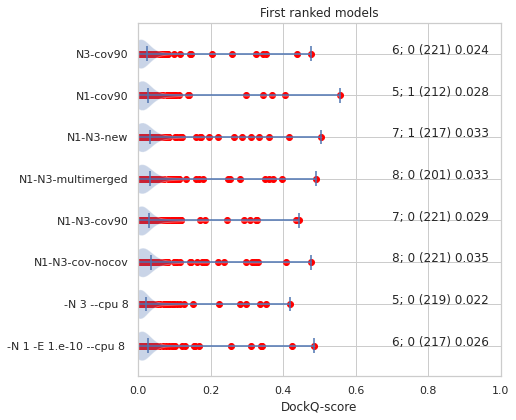

In [40]:
# FInd best method for each model.
selset=Rosettaset
#codes=df_max.loc[df_max.params.isin(selset)]["CODE"].unique()
f, ax = plt.subplots(figsize=(6.5, 6.5))
all_df=df_first.loc[(df_first.params.isin(selset))].reset_index()
all_df.sort_values("JHparams")
#print (all_df)
#plt.scatter(all_df.tmA,all_df.JHparams,color="red")
ax.set_title("First ranked models")
#ax.set_ylabel("Method")
ax.set_xlabel("DockQ-score")
ax.set(xlim=[0,1])
done={}
average=[]
length={}
pos=[]
POS=[]
i=0
data=[]
keys=[]
shift=0.2
for d in sorted(selset,reverse=False):
    #done[d]=0
    average+=[all_df.loc[(all_df.params==d)]["dockQ"].mean()]
    #length[d]=len(all_df.loc[(all_df.params==d)]["tmA"])
    pos+=[i]
    keys+=[d]
    data+=[all_df.loc[(all_df.JHparams==d)]["dockQ"].to_list()]
    POS+=[[i]*len(data[i])]
    #print (d,i,len(pos),pos[i],len(data),len(data[i]))
    i+=1
ax.set_yticklabels(keys)
ax.set_yticks(pos)
#print (data,POS)
cutoff=0.23
cutoffA=0.23
cutoffB=0.49
cutoffC=0.80

for i in range(len(data)):
    plt.scatter(data[i],POS[i],color="red")
    numgoodA=len([x for x in data[i] if x>cutoffA])
    numgoodB=len([x for x in data[i] if x>cutoffB])
    length=len(data[i])
    sstr=str(numgoodA)+"; "+str(numgoodB)+" ("+str(length)+") "+str(round(average[i],3))
    ax.annotate(sstr,(.7, i))
    #numgood=all (x > cutoffC for x in data[i])
    #ax.annotate("High:  "+str(numgood),(.8, i))

ax.violinplot(data,pos, points=80, vert=False, widths=0.7,
                      showmeans=True, showextrema=True, showmedians=False)    

plt.savefig("violin-dockQ.png",bbox_inches="tight")


# This is the first plot to save
#df_test= data_first["N1-merged"]
#plt.scatter(df_test.tmB,df_test.tmA)
#sns_plot = sns.jointplot(data=df_test, x="tmA", y="tmB")
#sns_plot.savefig("tmA-tmB.png")








KeyError: 'PDB'

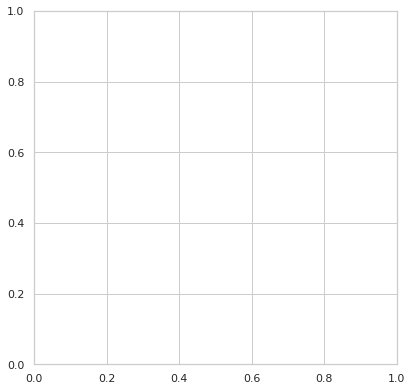

KeyError: 'PDB'

In [41]:
#df_test.loc[(df_test.tmA>0.8 )&(df_test.lenA>300)]["name"]
cutoff=0.2
f, ax = plt.subplots(figsize=(6.5, 6.5))
df_merged = pd.merge(data_max["PDB"],data_max["trRosetta"], on=['code'],how="inner")
plt.scatter(df_merged.dockQ_x,df_merged.dockQ_y,label=d)
df_merged = pd.merge(data_max["PDB"],data_max["confold"], on=['code'],how="inner")
plt.scatter(df_merged.dockQ_x,df_merged.dockQ_y,label=d)

ax.set_title("dockQ scores best model ")
ax.set_xlabel("dockQ PDB ")
ax.set_ylabel("dockQ trRosetta")
plt.savefig("trRosetta-PDB-dockQ.png",bbox_inches="tight")


KeyError: 'PDB'

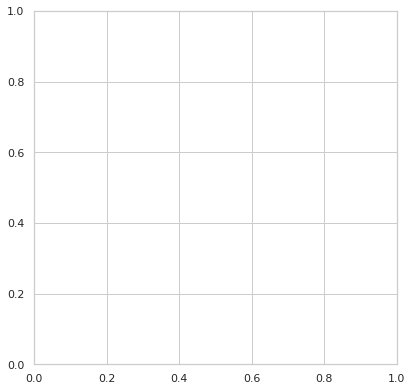

KeyError: 'PDB'

In [42]:
cutoff=0.2
f, ax = plt.subplots(figsize=(6.5, 6.5))
df_merged = pd.merge(data_max["PDB"],data_max["trRosetta"], on=['code'],how="inner")
plt.scatter(df_merged.tmAB_x,df_merged.tmAB_y,label=d)
df_merged = pd.merge(data_max["PDB"],data_max["confold"], on=['code'],how="inner")
plt.scatter(df_merged.tmAB_x,df_merged.tmAB_y,label=d)

ax.set_title("TM scores best model ")
ax.set_xlabel("TM PDB ")
ax.set_ylabel("TM trRosetta")
plt.savefig("trRosetta-PDB-TMscore.png",bbox_inches="tight")



KeyError: 'lenA'

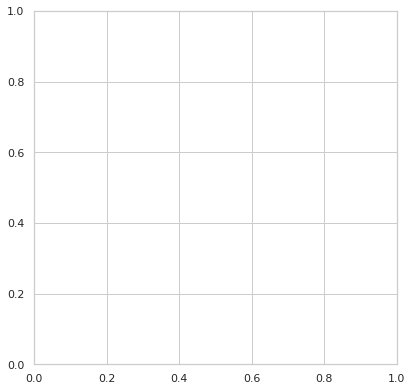

KeyError: 'lenA'

In [43]:
cutoff=0.2
f, ax = plt.subplots(figsize=(6.5, 6.5))
df_merged = pd.merge(data_max["trRosetta"],data_max["lenA"], on=['code'],how="inner")
plt.scatter(df_merged.tmAB_x,df_merged.tmAB_y,label=d)
df_merged = pd.merge(data_max["confold"],data_max["lenA"], on=['code'],how="inner")
plt.scatter(df_merged.tmAB_x,df_merged.tmAB_y,label=d)

ax.set_title("TM scores best model ")
ax.set_xlabel("TM PDB ")
ax.set_ylabel("TM trRosetta")
plt.savefig("trRosetta-PDB-TMscore.png",bbox_inches="tight")



In [44]:
data_max.keys()

dict_keys(['-N 3 --cpu 8', 'gramm-contact', 'gramm', 'gramm-raptorx', 'gramm-score2', 'gramm-score', 'gramm-trmodels', '-N 1 -E 1.e-100 --cpu 8', '-N 1 -E 1.e-2 ', 'N1-cov50', 'N1-cov90', 'N1-merged-pdb', 'N1-merged', 'N1-minprob25', 'N1-N3-cov90', 'N1-N3-cov-nocov', 'N1-N3-merged-fast', 'N1-N3-new', 'N1-N3-multimerged', '-N 1 -E 1.e-10 --cpu 8 ', 'N1-top1000-merged', 'N1-top1000', 'N1-top100', 'N1-top2000', 'N1-top500', 'N3-cov50', 'N3-cov90', '-N 3 --incE 1.e-2', 'N3-minprob25', '-N 5 --cpu 8', 'rbh-jh', 'TMdock-nohomology-1.e-5', 'TMdock-double', 'TMdock-nohomology', 'TMdock', 'trRosetta'])

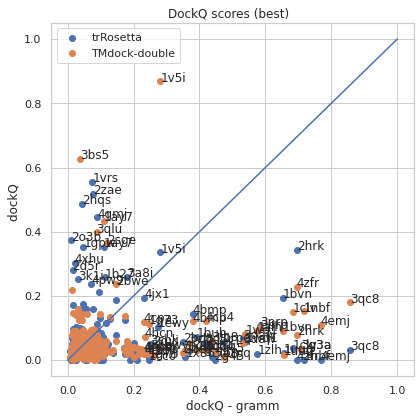

In [45]:
cutoff=0.23
f, ax = plt.subplots(figsize=(6.5, 6.5))
for d in ["trRosetta","TMdock-double"]:
    #if d!="N1-merged":continue   
    #print (d)
    df_merged = pd.merge(data_max["gramm"],data_max[d], on=['code'],how="inner")
    #print (df_merged)
    #newdf=df_merged["dockQ_x","dockQ_y"]  #.loc[(df_merged.dockQ_x>cutoff or df_merged.dockQ_y>cutoff) ]
    plt.scatter(df_merged.dockQ_x,df_merged.dockQ_y,label=d)
    for i, txt in enumerate(df_merged.name_x):
        #print (i,txt)
        try: 
            sstr=txt[0:4]
        except:
            sstr=df_merged.name_y[i][0:4]
        if (df_merged.dockQ_x[i]> cutoff or df_merged.dockQ_y[i]>cutoff):
            ax.annotate(sstr, (df_merged.dockQ_x[i], df_merged.dockQ_y[i]))
x=[0,1.0]
y=[0,1.0]
plt.plot(x,y)
ax.legend()
ax.set_title("DockQ scores (best)  ")
ax.set_xlabel("dockQ - gramm")
ax.set_ylabel("dockQ ")

plt.savefig("tr-tm-gramm-best.png",bbox_inches="tight")


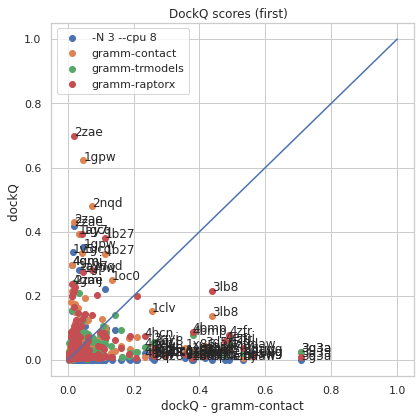

In [46]:
cutoff=0.23
f, ax = plt.subplots(figsize=(6.5, 6.5))
for d in ['-N 3 --cpu 8',"gramm-contact","gramm-trmodels","gramm-raptorx"]:
    #if d!="N1-merged":continue   
    #print (d)
    df_merged = pd.merge(data_first["gramm"],data_first[d], on=['code'],how="inner")
    #print (df_merged)
    #newdf=df_merged["dockQ_x","dockQ_y"]  #.loc[(df_merged.dockQ_x>cutoff or df_merged.dockQ_y>cutoff) ]
    plt.scatter(df_merged.dockQ_x,df_merged.dockQ_y,label=d)
    for i, txt in enumerate(df_merged.name_x):
        #print (i,txt)
        try: 
            sstr=txt[0:4]
        except:
            sstr=df_merged.name_y[i][0:4]
        if (df_merged.dockQ_x[i]> cutoff or df_merged.dockQ_y[i]>cutoff):
            ax.annotate(sstr, (df_merged.dockQ_x[i], df_merged.dockQ_y[i]))
x=[0,1.0]
y=[0,1.0]
plt.plot(x,y)
ax.legend()
ax.set_title("DockQ scores (first)  ")
ax.set_xlabel("dockQ - gramm-contact")
ax.set_ylabel("dockQ ")

plt.savefig("gramm-rosetta-best.png",bbox_inches="tight")


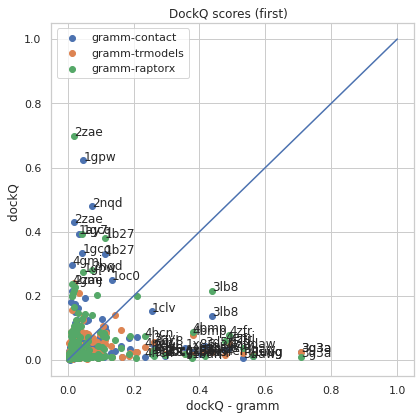

In [47]:
cutoff=0.23
f, ax = plt.subplots(figsize=(6.5, 6.5))
for d in ["gramm-contact","gramm-trmodels","gramm-raptorx"]:
    #if d!="N1-merged":continue   
    #print (d)
    df_merged = pd.merge(data_first["gramm"],data_first[d], on=['code'],how="inner")
    #print (df_merged)
    #newdf=df_merged["dockQ_x","dockQ_y"]  #.loc[(df_merged.dockQ_x>cutoff or df_merged.dockQ_y>cutoff) ]
    plt.scatter(df_merged.dockQ_x,df_merged.dockQ_y,label=d)
    for i, txt in enumerate(df_merged.name_x):
        #print (i,txt)
        try: 
            sstr=txt[0:4]
        except:
            sstr=df_merged.name_y[i][0:4]
        if (df_merged.dockQ_x[i]> cutoff or df_merged.dockQ_y[i]>cutoff):
            ax.annotate(sstr, (df_merged.dockQ_x[i], df_merged.dockQ_y[i]))
x=[0,1.0]
y=[0,1.0]
plt.plot(x,y)
ax.legend()
ax.set_title("DockQ scores (first)  ")
ax.set_xlabel("dockQ - gramm")
ax.set_ylabel("dockQ ")

plt.savefig("gramm-gramm-first.png",bbox_inches="tight")


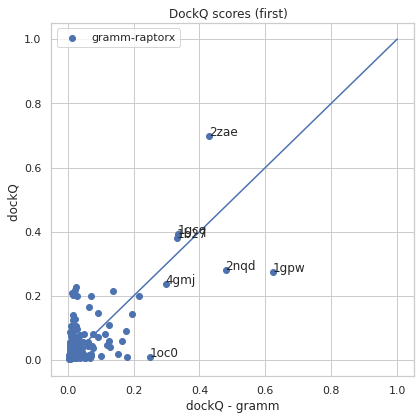

In [48]:
cutoff=0.23
f, ax = plt.subplots(figsize=(6.5, 6.5))
for d in ["gramm-raptorx"]:
    #if d!="N1-merged":continue   
    #print (d)
    df_merged = pd.merge(data_first["gramm-contact"],data_first[d], on=['code'],how="inner")
    #print (df_merged)
    #newdf=df_merged["dockQ_x","dockQ_y"]  #.loc[(df_merged.dockQ_x>cutoff or df_merged.dockQ_y>cutoff) ]
    plt.scatter(df_merged.dockQ_x,df_merged.dockQ_y,label=d)
    for i, txt in enumerate(df_merged.name_x):
        #print (i,txt)
        try: 
            sstr=txt[0:4]
        except:
            sstr=df_merged.name_y[i][0:4]
        if (df_merged.dockQ_x[i]> cutoff or df_merged.dockQ_y[i]>cutoff):
            ax.annotate(sstr, (df_merged.dockQ_x[i], df_merged.dockQ_y[i]))
x=[0,1.0]
y=[0,1.0]
plt.plot(x,y)
ax.legend()
ax.set_title("DockQ scores (first)  ")
ax.set_xlabel("dockQ - gramm")
ax.set_ylabel("dockQ ")

plt.savefig("gramm-contact-first.png",bbox_inches="tight")


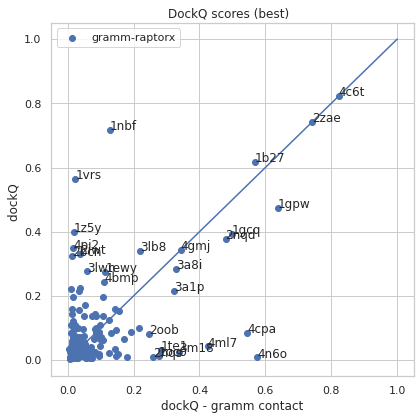

In [49]:
cutoff=0.23
f, ax = plt.subplots(figsize=(6.5, 6.5))
for d in ["gramm-raptorx"]:
    #if d!="N1-merged":continue   
    #print (d)
    df_merged = pd.merge(data_max["gramm-contact"],data_max[d], on=['code'],how="inner")
    #print (df_merged)
    #newdf=df_merged["dockQ_x","dockQ_y"]  #.loc[(df_merged.dockQ_x>cutoff or df_merged.dockQ_y>cutoff) ]
    plt.scatter(df_merged.dockQ_x,df_merged.dockQ_y,label=d)
    for i, txt in enumerate(df_merged.name_x):
        #print (i,txt)
        try: 
            sstr=txt[0:4]
        except:
            sstr=df_merged.name_y[i][0:4]
        if (df_merged.dockQ_x[i]> cutoff or df_merged.dockQ_y[i]>cutoff):
            ax.annotate(sstr, (df_merged.dockQ_x[i], df_merged.dockQ_y[i]))
x=[0,1.0]
y=[0,1.0]
plt.plot(x,y)
ax.legend()
ax.set_title("DockQ scores (best)  ")
ax.set_xlabel("dockQ - gramm contact")
ax.set_ylabel("dockQ ")

plt.savefig("gramm-contact-best.png",bbox_inches="tight")


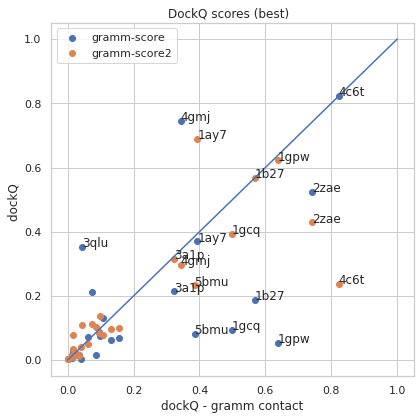

In [50]:
cutoff=0.23
f, ax = plt.subplots(figsize=(6.5, 6.5))
for d in ["gramm-score","gramm-score2"]:
    #if d!="N1-merged":continue   
    #print (d)
    df_merged = pd.merge(data_max["gramm-contact"],data_max[d], on=['code'],how="inner")
    #print (df_merged)
    #newdf=df_merged["dockQ_x","dockQ_y"]  #.loc[(df_merged.dockQ_x>cutoff or df_merged.dockQ_y>cutoff) ]
    plt.scatter(df_merged.dockQ_x,df_merged.dockQ_y,label=d)
    for i, txt in enumerate(df_merged.name_x):
        #print (i,txt)
        try: 
            sstr=txt[0:4]
        except:
            sstr=df_merged.name_y[i][0:4]
        if (df_merged.dockQ_x[i]> cutoff or df_merged.dockQ_y[i]>cutoff):
            ax.annotate(sstr, (df_merged.dockQ_x[i], df_merged.dockQ_y[i]))
x=[0,1.0]
y=[0,1.0]
plt.plot(x,y)
ax.legend()
ax.set_title("DockQ scores (best)  ")
ax.set_xlabel("dockQ - gramm contact")
ax.set_ylabel("dockQ ")

plt.savefig("gramm-contact-best.png",bbox_inches="tight")


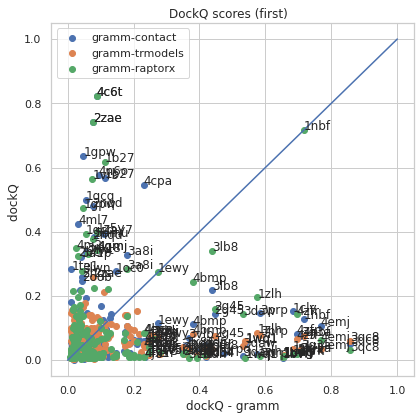

In [51]:
cutoff=0.23
f, ax = plt.subplots(figsize=(6.5, 6.5))
for d in ["gramm-contact","gramm-trmodels","gramm-raptorx"]:
    #if d!="N1-merged":continue   
    #print (d)
    df_merged = pd.merge(data_max["gramm"],data_max[d], on=['code'],how="inner")
    #print (df_merged)
    #newdf=df_merged["dockQ_x","dockQ_y"]  #.loc[(df_merged.dockQ_x>cutoff or df_merged.dockQ_y>cutoff) ]
    plt.scatter(df_merged.dockQ_x,df_merged.dockQ_y,label=d)
    for i, txt in enumerate(df_merged.name_x):
        #print (i,txt)
        try: 
            sstr=txt[0:4]
        except:
            sstr=df_merged.name_y[i][0:4]
        if (df_merged.dockQ_x[i]> cutoff or df_merged.dockQ_y[i]>cutoff):
            ax.annotate(sstr, (df_merged.dockQ_x[i], df_merged.dockQ_y[i]))
x=[0,1.0]
y=[0,1.0]
plt.plot(x,y)
ax.legend()
ax.set_title("DockQ scores (first)  ")
ax.set_xlabel("dockQ - gramm")
ax.set_ylabel("dockQ ")

plt.savefig("gramm-gramm-best.png",bbox_inches="tight")


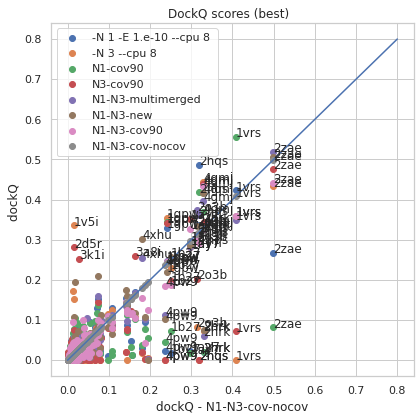

In [52]:
cutoff=0.23
f, ax = plt.subplots(figsize=(6.5, 6.5))
for d in Rosettaset:
    #if d!="N1-merged":continue   
    #print (d)
    df_merged = pd.merge(data_max["N1-N3-cov-nocov"],data_max[d], on=['code'],how="inner")
    #print (df_merged)
    #newdf=df_merged["dockQ_x","dockQ_y"]  #.loc[(df_merged.dockQ_x>cutoff or df_merged.dockQ_y>cutoff) ]
    plt.scatter(df_merged.dockQ_x,df_merged.dockQ_y,label=d)
    for i, txt in enumerate(df_merged.name_x):
        #print (i,txt)
        try: 
            sstr=txt[0:4]
        except:
            sstr=df_merged.name_y[i][0:4]
        if (df_merged.dockQ_x[i]> cutoff or df_merged.dockQ_y[i]>cutoff):
            ax.annotate(sstr, (df_merged.dockQ_x[i], df_merged.dockQ_y[i]))
x=[0,.8]
y=[0,.8]
plt.plot(x,y)
ax.legend()
ax.set_title("DockQ scores (best)  ")
ax.set_xlabel("dockQ - N1-N3-cov-nocov")
ax.set_ylabel("dockQ ")

plt.savefig("NX-best.png",bbox_inches="tight")


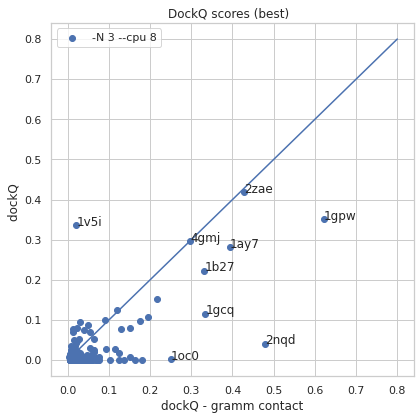

In [53]:
cutoff=0.23
f, ax = plt.subplots(figsize=(6.5, 6.5))
for d in ['-N 3 --cpu 8']:
    #if d!="N1-merged":continue   
    #print (d)
    df_merged = pd.merge(data_first['gramm-contact'],data_first[d], on=['code'],how="inner")
    #print (df_merged)
    #newdf=df_merged["dockQ_x","dockQ_y"]  #.loc[(df_merged.dockQ_x>cutoff or df_merged.dockQ_y>cutoff) ]
    plt.scatter(df_merged.dockQ_x,df_merged.dockQ_y,label=d)
    for i, txt in enumerate(df_merged.name_x):
        #print (i,txt)
        try: 
            sstr=txt[0:4]
        except:
            sstr=df_merged.name_y[i][0:4]
        if (df_merged.dockQ_x[i]> cutoff or df_merged.dockQ_y[i]>cutoff):
            ax.annotate(sstr, (df_merged.dockQ_x[i], df_merged.dockQ_y[i]))
x=[0,.8]
y=[0,.8]
plt.plot(x,y)
ax.legend()
ax.set_title("DockQ scores (best)  ")
ax.set_xlabel("dockQ - gramm contact")
ax.set_ylabel("dockQ ")

plt.savefig("N3-tr-best.png",bbox_inches="tight")


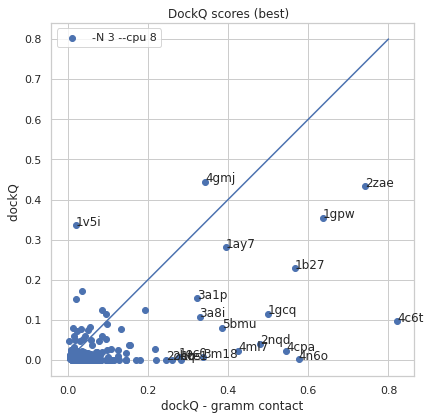

In [54]:
cutoff=0.23
f, ax = plt.subplots(figsize=(6.5, 6.5))
for d in ["-N 3 --cpu 8"]:
    #if d!="N1-merged":continue   
    #print (d)
    df_merged = pd.merge(data_max['gramm-contact'],data_max[d], on=['code'],how="inner")
    #print (df_merged)
    #newdf=df_merged["dockQ_x","dockQ_y"]  #.loc[(df_merged.dockQ_x>cutoff or df_merged.dockQ_y>cutoff) ]
    plt.scatter(df_merged.dockQ_x,df_merged.dockQ_y,label=d)
    for i, txt in enumerate(df_merged.name_x):
        #print (i,txt)
        try: 
            sstr=txt[0:4]
        except:
            sstr=df_merged.name_y[i][0:4]
        if (df_merged.dockQ_x[i]> cutoff or df_merged.dockQ_y[i]>cutoff):
            ax.annotate(sstr, (df_merged.dockQ_x[i], df_merged.dockQ_y[i]))
x=[0,.8]
y=[0,.8]
plt.plot(x,y)
ax.legend()
ax.set_title("DockQ scores (best)  ")
ax.set_xlabel("dockQ - gramm contact")
ax.set_ylabel("dockQ ")

plt.savefig("N3-tr-best.png",bbox_inches="tight")


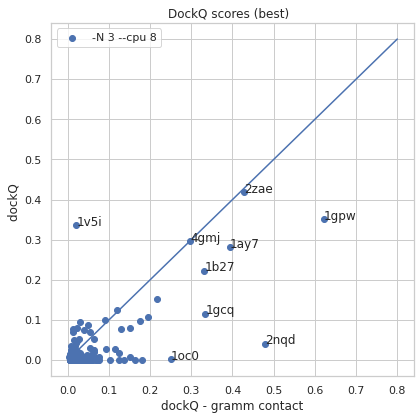

In [55]:
cutoff=0.23
f, ax = plt.subplots(figsize=(6.5, 6.5))
for d in ["-N 3 --cpu 8"]:
    #if d!="N1-merged":continue   
    #print (d)
    df_merged = pd.merge(data_first['gramm-contact'],data_first[d], on=['code'],how="inner")
    #print (df_merged)
    #newdf=df_merged["dockQ_x","dockQ_y"]  #.loc[(df_merged.dockQ_x>cutoff or df_merged.dockQ_y>cutoff) ]
    plt.scatter(df_merged.dockQ_x,df_merged.dockQ_y,label=d)
    for i, txt in enumerate(df_merged.name_x):
        #print (i,txt)
        try: 
            sstr=txt[0:4]
        except:
            sstr=df_merged.name_y[i][0:4]
        if (df_merged.dockQ_x[i]> cutoff or df_merged.dockQ_y[i]>cutoff):
            ax.annotate(sstr, (df_merged.dockQ_x[i], df_merged.dockQ_y[i]))
x=[0,.8]
y=[0,.8]
plt.plot(x,y)
ax.legend()
ax.set_title("DockQ scores (best)  ")
ax.set_xlabel("dockQ - gramm contact" )
ax.set_ylabel("dockQ ")

plt.savefig("N3-tr-best.png",bbox_inches="tight")


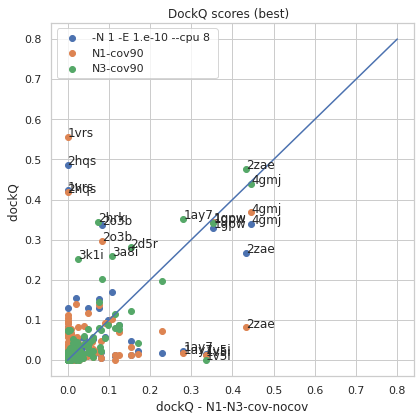

In [56]:
cutoff=0.23
f, ax = plt.subplots(figsize=(6.5, 6.5))
for d in ['-N 1 -E 1.e-10 --cpu 8 ', 'N1-cov90','N3-cov90']:
    #if d!="N1-merged":continue   
    #print (d)
    df_merged = pd.merge(data_max['-N 3 --cpu 8'],data_max[d], on=['code'],how="inner")
    #print (df_merged)
    #newdf=df_merged["dockQ_x","dockQ_y"]  #.loc[(df_merged.dockQ_x>cutoff or df_merged.dockQ_y>cutoff) ]
    plt.scatter(df_merged.dockQ_x,df_merged.dockQ_y,label=d)
    for i, txt in enumerate(df_merged.name_x):
        #print (i,txt)
        try: 
            sstr=txt[0:4]
        except:
            sstr=df_merged.name_y[i][0:4]
        if (df_merged.dockQ_x[i]> cutoff or df_merged.dockQ_y[i]>cutoff):
            ax.annotate(sstr, (df_merged.dockQ_x[i], df_merged.dockQ_y[i]))
x=[0,.8]
y=[0,.8]
plt.plot(x,y)
ax.legend()
ax.set_title("DockQ scores (best)  ")
ax.set_xlabel("dockQ - N1-N3-cov-nocov")
ax.set_ylabel("dockQ ")

plt.savefig("N3-N1-cov-best.png",bbox_inches="tight")


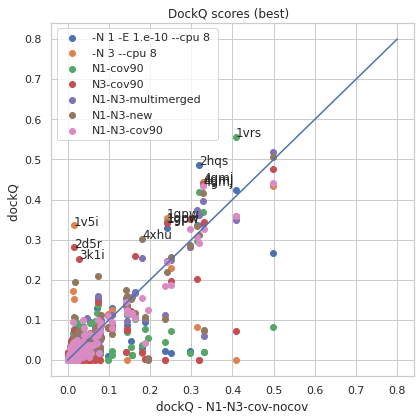

In [57]:
cutoff=0.23
f, ax = plt.subplots(figsize=(6.5, 6.5))
baseset="N1-N3-cov-nocov"
for d in Rosettaset:
    if d==baseset:continue   
    #print (d)
    df_merged = pd.merge(data_max[baseset],data_max[d], on=['code'],how="inner")
    #print (df_merged)
    #newdf=df_merged["dockQ_x","dockQ_y"]  #.loc[(df_merged.dockQ_x>cutoff or df_merged.dockQ_y>cutoff) ]
    plt.scatter(df_merged.dockQ_x,df_merged.dockQ_y,label=d)
    for i, txt in enumerate(df_merged.name_x):
        #print (i,txt)
        try: 
            sstr=txt[0:4]
        except:
            sstr=df_merged.name_y[i][0:4]
        #if (df_merged.dockQ_x[i]> cutoff or df_merged.dockQ_y[i]>cutoff):
        if (df_merged.dockQ_y[i]> cutoff and ( df_merged.dockQ_y[i]-0.1>df_merged.dockQ_x[i])):
            ax.annotate(sstr, (df_merged.dockQ_x[i], df_merged.dockQ_y[i]))
x=[0,.8]
y=[0,0.8]
plt.plot(x,y)
ax.legend()
ax.set_title("DockQ scores (best)  ")
ax.set_xlabel("dockQ - "+baseset)
ax.set_ylabel("dockQ ")

plt.savefig("Trrosetta-first.png",bbox_inches="tight")


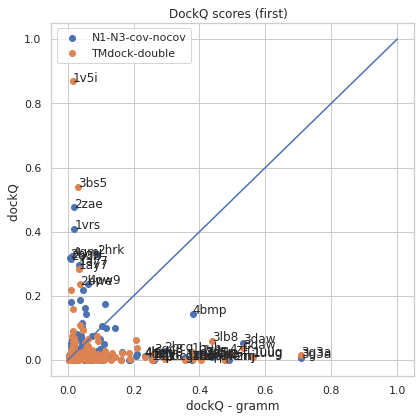

In [58]:
cutoff=0.23
f, ax = plt.subplots(figsize=(6.5, 6.5))
for d in ["N1-N3-cov-nocov","TMdock-double"]:
    #if d!="N1-merged":continue   
    #print (d)
    df_merged = pd.merge(data_first["gramm"],data_first[d], on=['code'],how="inner")
    #print (df_merged)
    #newdf=df_merged["dockQ_x","dockQ_y"]  #.loc[(df_merged.dockQ_x>cutoff or df_merged.dockQ_y>cutoff) ]
    plt.scatter(df_merged.dockQ_x,df_merged.dockQ_y,label=d)
    for i, txt in enumerate(df_merged.name_x):
        #print (i,txt)
        try: 
            sstr=txt[0:4]
        except:
            sstr=df_merged.name_y[i][0:4]
        if (df_merged.dockQ_x[i]> cutoff or df_merged.dockQ_y[i]>cutoff):
            ax.annotate(sstr, (df_merged.dockQ_x[i], df_merged.dockQ_y[i]))
x=[0,1.0]
y=[0,1.0]
plt.plot(x,y)
ax.legend()
ax.set_title("DockQ scores (first)  ")
ax.set_xlabel("dockQ - gramm")
ax.set_ylabel("dockQ ")

plt.savefig("tr-tm-gramm-first.png",bbox_inches="tight")
#cat.add_categories([1])
#df_merged.fillna(0, inplace =True)

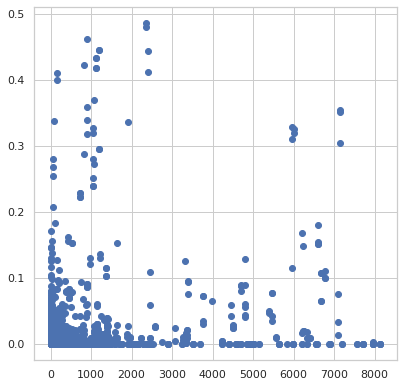

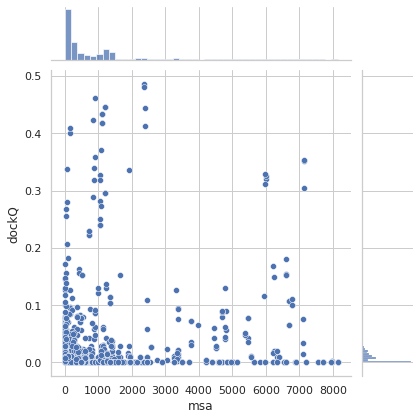

In [59]:
selset=['-N 3 --cpu 8', '-N 1 -E 1.e-100 --cpu 8', '-N 1 -E 1.e-2 ',  '-N 1 -E 1.e-10 --cpu 8 ',  '-N 3 --incE 1.e-2', '-N 5 --cpu 8']
#codes=df_max.loc[df_max.params.isin(selset)]["CODE"].unique()
f, ax = plt.subplots(figsize=(6.5, 6.5))
tempdf=df.loc[(df.JHparams.isin(selset))]
plt.scatter(tempdf.msa,tempdf.dockQ)
plt.savefig("msa-dockq-scatter.png",bbox_inches="tight")
sns_plot=sns.jointplot(data=tempdf,x="msa",y="dockQ")
sns_plot.savefig("msa-dockq.png")


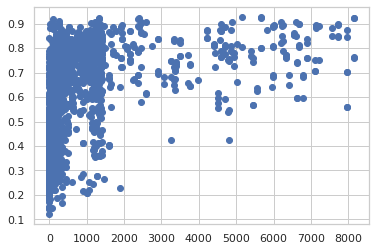

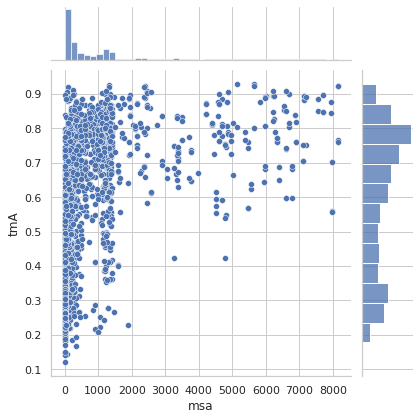

In [60]:
tempdf=df.loc[(df.JHparams.isin(selset))]
plt.scatter(tempdf.msa,tempdf.tmA)
#print (tempdf["msaA"])
#tempdf["logmsaA"]=np.log10(tempdf["msa"]+0.0000001)
plt.savefig("msa-tm-scatter.png",bbox_inches="tight")
sns_plot=sns.jointplot(data=tempdf,x="msa",y="tmA")
sns_plot.savefig("msa-tm.png")


<ipython-input-61-668fcd10ed9b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tempdf["numPPV"]=tempdf.longPPV*tempdf.long


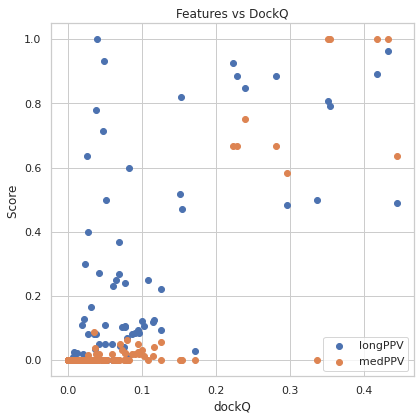

In [61]:
selset=['-N 3 --cpu 8']
f, ax = plt.subplots(figsize=(6.5, 6.5))
tempdf=df.loc[(df.JHparams.isin(selset))]
tempdf["numPPV"]=tempdf.longPPV*tempdf.long
for d in ["longPPV","medPPV"]:
    plt.scatter(tempdf.dockQ,tempdf[d],label=d)
ax.legend()
ax.set_title("Features vs DockQ")
ax.set_xlabel("dockQ")
ax.set_ylabel("Score ")

#print (tempdf["msaA"])
#tempdf["logmsaA"]=np.log10(tempdf["msa"]+0.0000001)
plt.savefig("dockQ-XX-scatter.png",bbox_inches="tight")


<ipython-input-62-61e6d3661c95>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tempdf["numPPV"]=tempdf.longPPV*tempdf.long


KeyError: 'auc'

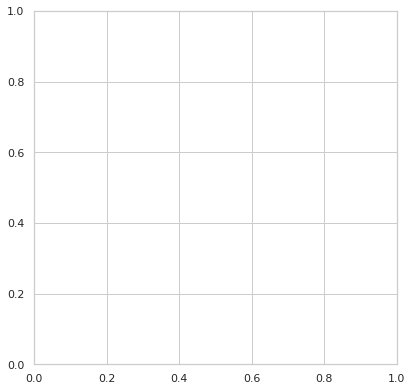

KeyError: 'auc'

In [62]:
selset=['-N 3 --cpu 8']
f, ax = plt.subplots(figsize=(6.5, 6.5))
tempdf=df.loc[(df.JHparams.isin(selset))]
tempdf["numPPV"]=tempdf.longPPV*tempdf.long
for d in ["auc"]:
    plt.scatter(tempdf.dockQ,tempdf[d],label=d)
ax.legend()
ax.set_title("Features vs DockQ")
ax.set_xlabel("dockQ")
ax.set_ylabel("Score ")

#print (tempdf["msaA"])
#tempdf["logmsaA"]=np.log10(tempdf["msa"]+0.0000001)
plt.savefig("dockQ-auc-scatter.png",bbox_inches="tight")


KeyError: 'pdbcontacts-new'

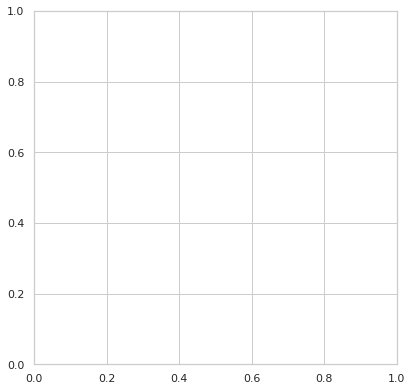

KeyError: 'pdbcontacts-new'

In [63]:
cutoff=1.0
f, ax = plt.subplots(figsize=(6.5, 6.5))
r=re.compile("^PDB|^pdb")
pdbset=list(filter(r.match, datasets))
pdbset=["pdbconfold"]

for d in pdbset:
    #if d!="N1-merged":continue   
    #print (d)
    if d=="pdbcontacts-new":continue
    df_merged = pd.merge(data_max["pdbcontacts-new"],data_max[d], on=['code'],how="inner")
    #print (df_merged)
    #newdf=df_merged["dockQ_x","dockQ_y"]  #.loc[(df_merged.dockQ_x>cutoff or df_merged.dockQ_y>cutoff) ]
    cc=np.corrcoef(df_merged.dockQ_x,df_merged.dockQ_y)
    #print (cc)
    
    
    plt.scatter(df_merged.dockQ_x,df_merged.dockQ_y,label=d)
    for i, txt in enumerate(df_merged.name_x):
        #print (i,txt)
        try: 
            sstr=txt[0:4]
        except:
            sstr=df_merged.name_y[i][0:4]
        if (df_merged.dockQ_x[i]> cutoff or df_merged.dockQ_y[i]>cutoff):
            ax.annotate(sstr, (df_merged.dockQ_x[i], df_merged.dockQ_y[i]))
x=[0,0.9]
y=[0,0.9]
plt.plot(x,y)
ax.legend()
ax.set_title("dockQ scores (frst model), CC=" + str(round(cc[0,1],3)) )
#ax.set_xlabel("dockQ ")
ax.set_ylabel("dockQ  "+d)
plt.savefig("pdbconfold.png",bbox_inches="tight")
#cat.add_categories([1])
#df_merged.fillna(0, inplace =True)

In [64]:
df.loc[df["rank"]==1]

name      JHparams lenA lenB     msa      msaA     msaB  \
0      1ay7_u1_A-1ay7_u2_A  -N 3 --cpu 8   97   90  1060.0    1485.0   2034.0   
2      1b27_u1_A-1b27_u2_A  -N 3 --cpu 8  109   90   733.0    1484.0   2034.0   
4      1bdj_u1_A-1bdj_u2_A  -N 3 --cpu 8  129  118  5651.0  349880.0  23051.0   
6      1buh_u1_A-1buh_u2_A  -N 3 --cpu 8  291   72  1177.0  555226.0   1820.0   
8      1bvn_u1_A-1bvn_u2_A  -N 3 --cpu 8  496   75    95.0   52623.0    123.0   
...                    ...           ...  ...  ...     ...       ...      ...   
22353  4yoc_u2_A-4yoc_u1_A     trRosetta  530  905   333.0    4076.0  31492.0   
22367  4gmj_u2_A-4gmj_u1_A     trRosetta  236  253  1189.0    1646.0   6152.0   
22371  4rix_u1_A-4rix_u2_A     trRosetta  294  273  1202.0  102230.0  79228.0   
22396  2zae_u2_A-2zae_u1_A     trRosetta   93  107  1058.0    1521.0   1659.0   
22405  1gpw_u2_A-1gpw_u1_A     trRosetta  204  252  7137.0   67629.0  58466.0   

      cdhit  dockQ   fnat  ...  CODE        params      tmAB     msaAB  \
0      1026  0.281  0.167  ...  1ay7  -N 3 --cpu 8  0.829400    1759.5   
2       654  0.223  0.120  ...  1b27  -N 3 --cpu 8  0.824750    1759.0   
4      5071  0.000  0.000  ...  1bdj  -N 3 --cpu 8  0.862585  186465.5   
6       548  0.000  0.000  ...  1buh  -N 3 --cpu 8  0.560760  278523.0   
8        85  0.006  0.000  ...  1bvn  -N 3 --cpu 8  0.619215   26373.0   
...     ...    ...    ...  ...   ...           ...       ...       ...   
22353   189  0.007  0.000  ...  4yoc     trRosetta  0.209005   17784.0   
22367   546  0.445  0.780  ...  4gmj     trRosetta  0.825750    3899.0   
22371   596  0.011  0.000  ...  4rix     trRosetta  0.649540   90729.0   
22396   804  0.519  0.452  ...  2zae     trRosetta  0.802020    1590.0   
22405  5343  0.354  0.293  ...  1gpw     trRosetta  0.889770   63047.5   

       tmAB_max  msaAB_max tmAB_min msaAB_min  numcorrect   len  
0       0.84371     2034.0  0.81509    1485.0      53.985   187  
2       0.85428     2034.0  0.79522    1484.0      49.025   199  
4       0.92789   349880.0  0.79728   23051.0           0   247  
6       0.73259   555226.0  0.38893    1820.0           0   363  
8       0.70905    52623.0  0.52938     123.0           0   571  
...         ...        ...      ...       ...         ...   ...  
22353   0.22898    31492.0  0.18903    4076.0           0  1435  
22367   0.85191     6152.0  0.79959    1646.0     133.061   489  
22371   0.66094   102230.0  0.63814   79228.0           0   567  
22396   0.82241     1659.0  0.78163    1521.0      81.958   200  
22405   0.89718    67629.0  0.88236   58466.0      102.96   456  

[5207 rows x 65 columns]

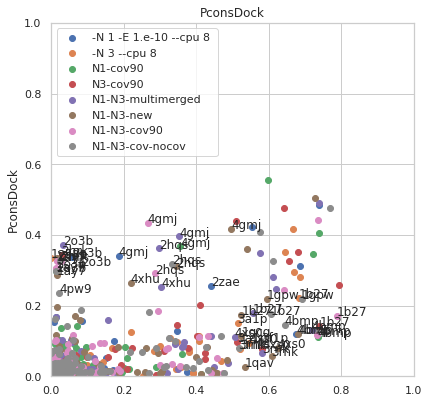

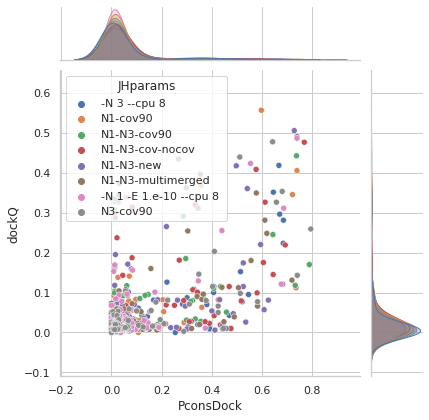

In [65]:
selset=['-N 1 -E 1.e-10 --cpu 8 ','-N 3 --cpu 8', 
            'N1-cov90','N3-cov90', 'N1-N3-multimerged', 'N1-N3-new', 'N1-N3-cov90', 'N1-N3-cov-nocov']
#            'rbh-jh',"confold","trRosetta"]
#selset=['trRosetta']
#codes=df_max.loc[df_max.params.isin(selset)]["CODE"].unique()
f, ax = plt.subplots(figsize=(6.5, 6.5))
DockQcut=0.23
Pconscut=0.5
for d in selset:
    tempdf=df.loc[(df.JHparams==d)&(df["rank"]==1)].reset_index()
    plt.scatter(tempdf.PconsDock,tempdf.dockQ,label=d)
    for i, txt in enumerate(tempdf.name):
        #print (i,txt)
        #print (tempdf.name[i])
        #print (tempdf.dockQ[i])
        #print (tempdf.PconsDock[i])
        try: 
            sstr=txt[0:4]
        except:
            sstr=tempdf.name[i][0:4]
        if (tempdf.dockQ[i]< DockQcut and tempdf.PconsDock[i]>Pconscut):
            ax.annotate(sstr, (tempdf.PconsDock[i], tempdf.dockQ[i]))
        if (tempdf.dockQ[i]> DockQcut and tempdf.PconsDock[i]<Pconscut):
            ax.annotate(sstr, (tempdf.PconsDock[i], tempdf.dockQ[i]))
ax.legend(loc = 'upper left')
ax.set(xlim=[0,1],ylim=[0,1])
ax.set_title("PconsDock")
ax.set_ylabel("dockQ  ")
ax.set_ylabel("PconsDock")
#ax.legend()
tempdf=df.loc[(df.JHparams.isin(selset))&(df["rank"]==1)]
plt.savefig("pcons-dockq-scatter.png",bbox_inches="tight")
sns_plot=sns.jointplot(data=tempdf,x="PconsDock",y="dockQ",hue="JHparams")
sns_plot.savefig("pcons-dockq.png")



In [66]:
#df.keys()

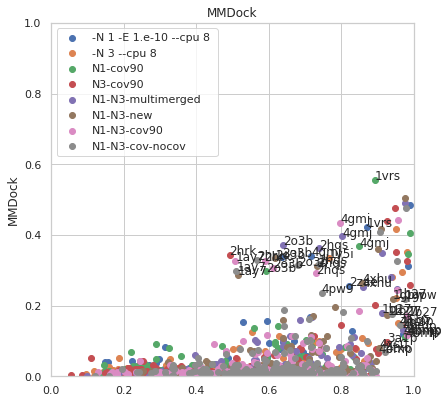

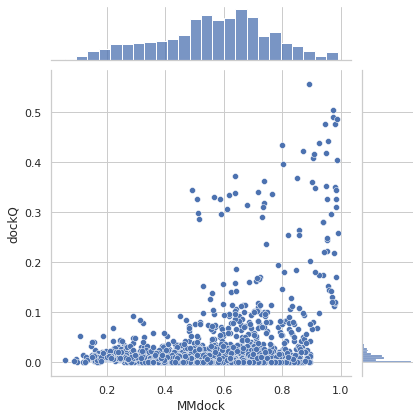

In [67]:
#selset=['-N 3 --cpu 8']
#selset=['trRosetta']
#codes=df_max.loc[df_max.params.isin(selset)]["CODE"].unique()
f, ax = plt.subplots(figsize=(6.5, 6.5))
DockQcut=0.23
MMcut=0.90

for d in selset:
    tempdf=df.loc[(df.JHparams==d)&(df["rank"]==1)].reset_index()
    plt.scatter(tempdf.MMdock,tempdf.dockQ,label=d)
    for i, txt in enumerate(tempdf.name):
        #print (i,txt)
        try: 
            sstr=txt[0:4]
        except:
            sstr=tempdf.name[i][0:4]
        if (tempdf.dockQ[i]< DockQcut and tempdf.MMdock[i]>MMcut):
            ax.annotate(sstr, (tempdf.MMdock[i], tempdf.dockQ[i]))
        if (tempdf.dockQ[i]> DockQcut and tempdf.MMdock[i]<MMcut):
            ax.annotate(sstr, (tempdf.MMdock[i], tempdf.dockQ[i]))
ax.legend(loc = 'upper left')
ax.set(xlim=[0,1],ylim=[0,1])
ax.set_title("MMDock")
ax.set_ylabel("dockQ  ")
ax.set_ylabel("MMDock")
#ax.legend()
tempdf=df.loc[(df.JHparams.isin(selset))&(df["rank"]==1)]
#plt.scatter(tempdf.MMdock,tempdf.dockQ)
plt.savefig("MM-dockq-scatter.png",bbox_inches="tight")
sns_plot=sns.jointplot(data=tempdf,x="MMdock",y="dockQ")
sns_plot.savefig("MM-dockq.png")


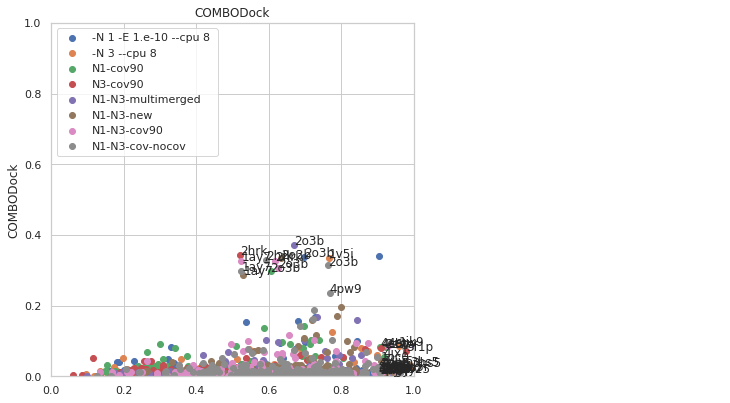

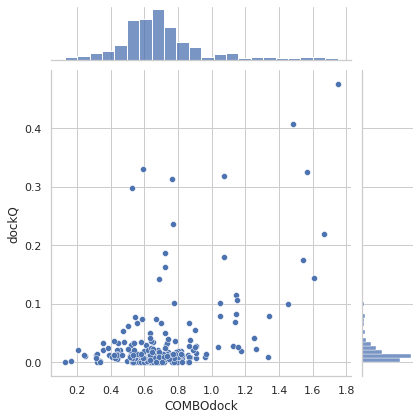

In [68]:
#tempdf.keys()
#selset=['-N 3 --cpu 8']
#selset=['trRosetta']
#codes=df_max.loc[df_max.params.isin(selset)]["CODE"].unique()
f, ax = plt.subplots(figsize=(6.5, 6.5))
DockQcut=0.23
COMBOcut=0.90
df["COMBOdock"]=df["PconsDock"]+df["MMdock"]

for d in selset:
    tempdf=df.loc[(df.JHparams==d)&(df["rank"]==1)].reset_index()
    plt.scatter(tempdf.COMBOdock,tempdf.dockQ,label=d)
    for i, txt in enumerate(tempdf.name):
        #print (i,txt)
        try: 
            sstr=txt[0:4]
        except:
            sstr=tempdf.name[i][0:4]
        if (tempdf.dockQ[i]< DockQcut and tempdf.COMBOdock[i]>COMBOcut):
            ax.annotate(sstr, (tempdf.COMBOdock[i], tempdf.dockQ[i]))
        if (tempdf.dockQ[i]> DockQcut and tempdf.COMBOdock[i]<COMBOcut):
            ax.annotate(sstr, (tempdf.COMBOdock[i], tempdf.dockQ[i]))
ax.legend(loc = 'upper left')
ax.set(xlim=[0,1],ylim=[0,1])
ax.set_title("COMBODock")
ax.set_ylabel("dockQ  ")
ax.set_ylabel("COMBODock")
#plt.scatter(tempdf.COMBOdock,tempdf.dockQ)
plt.savefig("COMBO-dockq-scatter.png",bbox_inches="tight")
sns_plot=sns.jointplot(data=tempdf,x="COMBOdock",y="dockQ")
sns_plot.savefig("COMBO-dockq.png")


In [69]:
#df.loc[(df.JHparams=="trRosetta")&(df.code=="1ay7")]["LRMS"]
#dftmp["dockQ"]>0.23
#dftmp

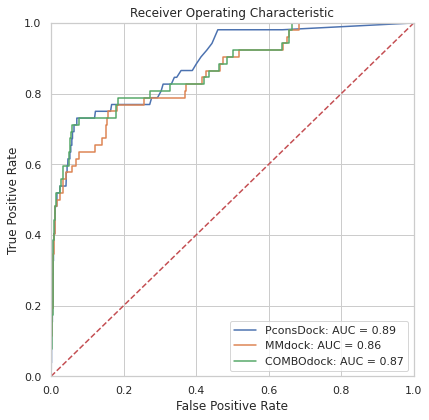

In [70]:
#import sklearn.metrics as metrics
f, ax = plt.subplots(figsize=(6.5, 6.5))
DockQcut=0.23
# calculate the fpr and tpr for all thresholds of the classification
dftmp=df.loc[(df.JHparams.isin(selset))&(df["rank"]==1)]
correct=dftmp["dockQ"]>DockQcut
# method I: plt
for d in ["PconsDock","MMdock","COMBOdock"]:
    values=dftmp[d]
    fpr, tpr, threshold = metrics.roc_curve(correct, values)
    roc_auc = metrics.auc(fpr, tpr)
    plt.plot(fpr, tpr, label = d+': AUC = %0.2f' % roc_auc)

ax.set_title('Receiver Operating Characteristic')

plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.savefig("ROC-pconsdock.png",bbox_inches="tight")


In [71]:
#import scikitplot as skplt
#import matplotlib.pyplot as plt

#correct=dftmp["dockQ"]>DockQcut
#values = dftmp[["PconsDock","MMdock","COMBOdock"]]
#skplt.metrics.plot_roc_curve(correct, values)
#plt.show()


In [72]:
cf_df=df.loc[df.JHparams=="confold"].sort_values(["dockQ"])
cf_df

Empty DataFrame
Columns: [name, JHparams, lenA, lenB, msa, msaA, msaB, cdhit, dockQ, fnat, iRMS, LRMS, fnonnat, mm, tmA, tmB, long, med, longPPV, medPPV, longA, medA, longPPVA, medPPVA, longB, medB, longPPVB, medPPVB, short, shortPPV, shortA, shortPPVA, shortB, shortPPVB, shortpdb, medpdb, longpdb, avprob, evalue, seqid, hhprob, hhevalue, hhscore, PconsDock, MMdock, shortMCC, medMCC, longMCC, shortF1, medF1, longF1, rank, pcd, mmd, code, CODE, params, tmAB, msaAB, tmAB_max, msaAB_max, tmAB_min, msaAB_min, numcorrect, len, COMBOdock]
Index: []

[0 rows x 66 columns]

AttributeError: 'DataFrame' object has no attribute 'codes'

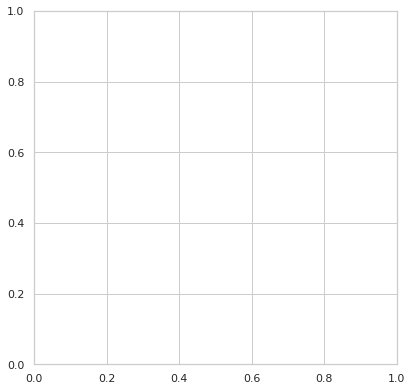

AttributeError: 'DataFrame' object has no attribute 'codes'

In [73]:
# Models where RaptorX is good
models=["1ycs","1gpw","1ycs","2zae"]
selset=Dockingset
f, ax = plt.subplots(figsize=(6.5, 6.5))

all_df=df_first.loc[(df_max.params.isin(selset) & df_max.codes.isin(models))].reset_index()
all_df.sort_values("JHparams")
#print (all_df)
ax.set_title("Best models")
ax.set_ylabel("Method")
ax.set_xlabel("dockQ")
ax.set(xlim=[0,1.1])
